In [1]:
import pandas as pd
import numpy as np
import  wxee
import matplotlib.pyplot as plt
from sklearn import tree
import time
from datetime import timedelta

In [2]:
try:
    import geemap, ee
except ModuleNotFoundError:
    if 'google.colab' in str(get_ipython()):
        print("package not found, installing w/ pip in Google Colab...")
        !pip install geemap
    else:
        print("package not found, installing w/ conda...")
        !conda install mamba -c conda-forge -y
        !mamba install geemap -c conda-forge -y
    import geemap, ee

In [3]:
try:
        geemap.ee_initialize()
except Exception as e:
        geemap.ee_initialize()
        geemap.ee_initialize()

from geemap import geojson_to_ee, ee_to_geojson
import eemont

In [ ]:
# Load the required datasets from Chicago and Philly

# TA SHMANITKA EINAI  AYTA

In [ ]:
volos_turbo_final.to_csv('./data/csvs/volos_turbo_final.csv',index=False)

In [4]:
# We have obtained two datasets from the City of Chicago Portal.
# These datasets contain service requests from citizens
# Among those requests there are some regarding abandoned buildigs and  vacant areas.
# 

# Load chicago service calls and then take the abandoned buildings reports from that
chicago_service_new = pd.read_csv("./data/csvs/311_Service_Requests_new.csv")
chicago_service_new

C:\Users\Christos\anaconda3\envs\ml\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (9,10,11,12,18,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SR_NUMBER,SR_TYPE,SR_SHORT_CODE,OWNER_DEPARTMENT,STATUS,CREATED_DATE,LAST_MODIFIED_DATE,CLOSED_DATE,STREET_ADDRESS,CITY,...,PRECINCT,SANITATION_DIVISION_DAYS,CREATED_HOUR,CREATED_DAY_OF_WEEK,CREATED_MONTH,X_COORDINATE,Y_COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,SR19-01757960,Street Light Out Complaint,SFD,CDOT - Department of Transportation,Completed,06/20/2019 10:25:56 PM,11/06/2019 11:29:59 PM,11/06/2019 11:29:59 PM,NaN,NaN,...,NaN,NaN,22,5,6,NaN,NaN,NaN,NaN,NaN
1,SR19-01793200,Graffiti Removal Request,GRAF,Streets and Sanitation,Completed,06/25/2019 04:08:43 PM,06/25/2019 08:31:37 PM,06/25/2019 04:09:00 PM,NaN,NaN,...,NaN,NaN,16,3,6,NaN,NaN,NaN,NaN,NaN
2,SR19-01785709,Aircraft Noise Complaint,AVN,Aviation,Completed,06/25/2019 04:25:25 AM,06/25/2019 08:31:24 AM,06/25/2019 04:25:26 AM,NaN,NaN,...,NaN,NaN,4,3,6,NaN,NaN,NaN,NaN,NaN
3,SR19-01785387,Report an Injured Animal,EAQ,Animal Care and Control,Completed,06/24/2019 11:36:02 PM,06/25/2019 08:54:15 AM,06/25/2019 08:54:15 AM,NaN,NaN,...,NaN,NaN,23,2,6,NaN,NaN,NaN,NaN,NaN
4,SR19-01785441,Aircraft Noise Complaint,AVN,Aviation,Completed,06/24/2019 11:57:44 PM,06/25/2019 04:31:55 AM,06/24/2019 11:57:44 PM,NaN,NaN,...,NaN,NaN,23,2,6,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6219178,SR22-00840282,Graffiti Removal Request,GRAF,Streets and Sanitation,Completed,05/19/2022 04:14:41 PM,05/20/2022 02:11:41 PM,05/20/2022 02:11:41 PM,815 N MILWAUKEE AVE,NaN,...,35.0,NaN,16,5,5,1.168731e+06,1.905694e+06,41.896757,-87.655729,"(41.89675650597323, -87.6557285319848)"
6219179,SR22-00840107,Rodent Baiting/Rat Complaint,SGA,Streets and Sanitation,Completed,05/19/2022 03:53:37 PM,05/24/2022 01:36:02 PM,05/24/2022 01:36:02 PM,5933 S PRAIRIE AVE,NaN,...,7.0,NaN,15,5,5,1.179160e+06,1.865599e+06,41.786502,-87.618652,"(41.786501989913454, -87.61865161410047)"
6219180,SR22-00840144,Garbage Cart Maintenance,SIE,Streets and Sanitation,Completed,05/19/2022 03:57:25 PM,05/26/2022 08:14:39 AM,05/26/2022 08:14:39 AM,749 W 29TH ST,NaN,...,16.0,NaN,15,5,5,1.171593e+06,1.885590e+06,41.841528,-87.645809,"(41.8415280201541, -87.64580868753987)"
6219181,SR22-00840184,Garbage Cart Maintenance,SIE,Streets and Sanitation,Completed,05/19/2022 04:01:54 PM,05/27/2022 10:13:46 AM,05/27/2022 10:13:46 AM,4359 S KOMENSKY AVE,NaN,...,2.0,NaN,16,5,5,1.150158e+06,1.875213e+06,41.813496,-87.724737,"(41.81349611266885, -87.72473723165622)"


# S2  region kai regions  time series gia  CHICAGO

In [151]:
#generate time series over aoi, get spectral indices(awsome index) #  fixed
import time
from datetime import timedelta
def generate_time_series_regions(geometry,startDate,endDate):
    print('start  collecting satellite  images')
    
    start_time = time.monotonic()
    
    #collect imageCollection
    
    s2 = (ee.ImageCollection("COPERNICUS/S2_SR")#.filterMetadata('CLOUDY_PIXEL_PERCENTAGE', 'less_than', 5)
      .filterDate(startDate,endDate)
      .filterBounds(geometry)
      .maskClouds()
      .scaleAndOffset()
      .spectralIndices(['NDVI','NDBI','IBI','EMBI','VgNIRBI','VrNIRBI','PISI'],online=True)).select([ 'NDVI', 'NDBI', 'IBI', 
                                                                                              'EMBI','VgNIRBI','VrNIRBI','PISI'])

    print(len(s2))
    ts = s2.wx.to_time_series()
    
    
    #cloudless = ts.filterBounds(geometry).filterMetadata("CLOUDY_PIXEL_PERCENTAGE", "less_than", 5)
    #use geemap to generate a pandas dataframe from the time series(contains the ts for the selected indices)
    #satellite_df= geemap.ee_to_pandas(time_series)
    end_time = time.monotonic()
    print(timedelta(seconds=end_time - start_time))
    print('done collecting')
    
    print('start  calculating ts')
    start_time = time.monotonic()
    ts_mean =ts.aggregate_time(frequency="month",reducer=ee.Reducer.mean())#.filterMetadata('CLOUDY_PIXEL_PERCENTAGE', 'less_than', 20)
    time_series = ts_mean.getTimeSeriesByRegions(
                               collection = geometry,
                               bands = ['NDVI','NDBI','IBI','EMBI','VgNIRBI','VrNIRBI','PISI'],
                               reducer = [ee.Reducer.mean()],
                               scale = 10)
    end_time = time.monotonic()
    print(timedelta(seconds=end_time - start_time))
    print('done calculating ts')
    print(len(time_series))
    print('start  making dataframe ts')
    start_time = time.monotonic()
    satellite_df = geemap.ee_to_pandas(time_series)

    end_time = time.monotonic()
    print(timedelta(seconds=end_time - start_time))
    print('done making dataframe ts')
    satellite_df[satellite_df == -9999] = np.nan
    #satellite_df[satellite_df > -9999] = np.nan
    #filter outliers
    #satellite_df1=pd.DataFrame()
    #satellite_df1['date'] =
    #satellite_df=satellite_df[(np.abs(stats.zscore(satellite_df.drop(['date','reducer'],axis=1))) < 3).all(axis=1)]#==np.nan
    satellite_df['date']=pd.to_datetime(satellite_df['date'],infer_datetime_format = True)
    satellite_df['NDVI']=satellite_df['NDVI'].fillna(satellite_df['NDVI'].mean())
    satellite_df['NDBI']=satellite_df['NDBI'].fillna(satellite_df['NDBI'].mean())
    satellite_df['EMBI']=satellite_df['EMBI'].fillna(satellite_df['EMBI'].mean())
    satellite_df['IBI']=satellite_df['IBI'].fillna(satellite_df['IBI'].mean())
    satellite_df['VgNIRBI']=satellite_df['VgNIRBI'].fillna(satellite_df['VgNIRBI'].mean())
    satellite_df['VrNIRBI']=satellite_df['VrNIRBI'].fillna(satellite_df['VrNIRBI'].mean())
    satellite_df['PISI']=satellite_df['PISI'].fillna(satellite_df['PISI'].mean())
    #satellite_df['date'] = satellite_df1['date']
    return satellite_df

# Viirs gia  region kai gia regions time series gia tmo CHICAGO

In [150]:
def get_viirs_regions(collection,startDate,endDate):
#get times series of average radiance from viirs dnb monthly composites
#startDate,endDate= set_dates()
    viirs = ee.ImageCollection("NOAA/VIIRS/DNB/MONTHLY_V1/VCMSLCFG").filterDate(startDate,endDate).select('avg_rad').scaleAndOffset()
    print(len(viirs))

    ts = viirs.getTimeSeriesByRegions(ee.Reducer.mean(),
                              collection = collection,
                              scale = 10,
                              #bestEffort = True,
                              #maxPixels = 2e9,
                              dateFormat = 'YYYYMMdd'
                              )
    print(len(ts))
    viirs_df = geemap.ee_to_pandas(ts)
    viirs_df['date'] = pd.to_datetime(viirs_df['date'],infer_datetime_format = True)
    return viirs_df

def get_viirs_region(geometry,startDate,endDate):
#get times series of average radiance from viirs dnb monthly composites
#startDate,endDate= set_dates()
    viirs = ee.ImageCollection("NOAA/VIIRS/DNB/MONTHLY_V1/VCMSLCFG").filterDate(startDate,endDate).select('avg_rad').scaleAndOffset()
    print(len(viirs))

    ts = viirs.getTimeSeriesByRegion(ee.Reducer.mean(),
                              geometry = geometry,
                              scale = 10,
                              #bestEffort = True,
                              maxPixels = 2e9,
                              dateFormat = 'YYYYMMdd'
                              )
    print(len(ts))
    viirs_df = geemap.ee_to_pandas(ts)
    viirs_df['date'] = pd.to_datetime(viirs_df['date'],infer_datetime_format = True)
    return viirs_df

In [298]:
def get_dnb_regions(collection,startDate,endDate):
#get times series of average radiance from viirs dnb monthly composites
#startDate,endDate= set_dates()
    viirs = ee.ImageCollection("NOAA/VIIRS/DNB/MONTHLY_V1/VCMSLCFG").filterDate(startDate,endDate).scaleAndOffset()
    print(len(viirs))

    ts = viirs.getTimeSeriesByRegions(ee.Reducer.mean(),
                              collection = collection,
                              scale = 10,
                              #bestEffort = True,
                              #maxPixels = 2e9,
                              dateFormat = 'YYYYMMdd'
                              )
    print(len(ts))
    viirs_df = geemap.ee_to_pandas(ts)
    viirs_df['date'] = pd.to_datetime(viirs_df['date'],infer_datetime_format = True)
    return viirs_df

def get_dnb_region(geometry,startDate,endDate):
#get times series of average radiance from viirs dnb monthly composites
#startDate,endDate= set_dates()
    viirs = ee.ImageCollection("NOAA/VIIRS/DNB/MONTHLY_V1/VCMSLCFG").filterDate(startDate,endDate).scaleAndOffset()
    print(len(viirs))

    ts = viirs.getTimeSeriesByRegion(ee.Reducer.mean(),
                              geometry = geometry,
                              scale = 10,
                              #bestEffort = True,
                              maxPixels = 2e9,
                              dateFormat = 'YYYYMMdd'
                              )
    print(len(ts))
    viirs_df = geemap.ee_to_pandas(ts)
    viirs_df['date'] = pd.to_datetime(viirs_df['date'],infer_datetime_format = True)
    return viirs_df

# S2 and  VIIRS FOR NOT ABANDONED VOLOS OBTAINED BY OVERPASS API AND OPENSTREETMAPS

## AMA THELW  NA TA FORTWSW PALI EINAI SE CSV EDW
volos_turbo_s2 = pd.read_csv('./data/csvs/volos_turbo_s2.csv')

volos_turbo_viirs = pd.read_csv('./data/csvs/volos_turbo_viirs.csv')

volos_turbo_cfg = pd.read_csv('./data/csvs/turbo_volos_cfg.csv')

volos_amenities_cfg  = pd.read_csv('./data/csvs/volos_amenities_cfg.csv')

In [300]:
import geopandas as gpd
volos_turbo = gpd.read_file("./data/geojson/turbo_volos_bldgs.geojson")
volos_turbo

,id,@id,access,addr:city,addr:country,addr:housename,addr:housenumber,addr:postcode,addr:street,addr:unit,...,theatre:type,toilets:wheelchair,tourism,tower:type,type,website,wheelchair,wikidata,wikipedia,geometry
0,relation/2821121,relation/2821121,None,None,None,None,None,None,None,None,...,None,None,None,None,multipolygon,None,None,None,None,"POLYGON ((22.93043 39.38660, 22.93048 39.38655..."
1,relation/2821125,relation/2821125,None,None,None,None,None,None,None,None,...,None,None,None,None,multipolygon,None,None,None,None,"POLYGON ((22.96682 39.35537, 22.96752 39.35464..."
2,relation/3286509,relation/3286509,None,None,None,None,None,None,None,None,...,None,None,None,None,multipolygon,None,None,None,None,"POLYGON ((22.92219 39.35849, 22.92179 39.35802..."
3,relation/3286513,relation/3286513,None,None,None,None,None,None,None,None,...,None,None,None,None,multipolygon,None,None,None,None,"POLYGON ((22.93658 39.37681, 22.93589 39.37672..."
4,relation/3560382,relation/3560382,None,None,None,None,None,None,None,None,...,None,None,None,None,multipolygon,None,None,None,None,"POLYGON ((22.95421 39.37342, 22.95387 39.37381..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199,way/243195321,way/243195321,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((22.93043 39.38665, 22.93071 39.38680..."
1200,way/581728023,way/581728023,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((22.95902 39.35127, 22.95905 39.35125..."
1201,node/1886551394,node/1886551394,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (22.93858 39.36584)
1202,node/2149437197,node/2149437197,None,None,None,7ο Γυμνάσιο Βόλου,None,38333,Χείρωνος,None,...,None,None,None,None,None,None,None,None,None,POINT (22.94066 39.37105)


In [301]:
volos_turbo_fc=geemap.geopandas_to_ee(volos_turbo)
volos_turbo_fc

In [259]:
abandoned_volos_s2=pd.read_csv('./data/csvs/abandoned_volos.csv')

In [270]:
abandoned_volos_dnb

,date,cf_cvg,avg_rad,reducer,month,year
0,2019-01-01,10,72.930000,mean,1,2019
1,2019-01-01,10,72.930000,mean,1,2019
2,2019-01-01,10,74.989998,mean,1,2019
3,2019-01-01,10,72.930000,mean,1,2019
4,2019-02-01,6,82.989998,mean,2,2019
...,...,...,...,...,...,...
159,2022-04-01,8,77.650002,mean,4,2022
160,2022-05-01,14,68.900002,mean,5,2022
161,2022-05-01,14,68.900002,mean,5,2022
162,2022-05-01,14,74.459999,mean,5,2022


In [261]:
abandoned_volos_dnb  = pd.read_csv('./data/csvs/abandoned_volos_cfg.csv')

In [269]:
abandoned_volos_dnb['date'] = pd.to_datetime(abandoned_volos_dnb['date'], errors='coerce')
abandoned_volos_s2['date'] = pd.to_datetime(abandoned_volos_s2['date'] , errors='coerce')
abandoned_volos_dnb['month']=abandoned_volos_dnb['date'].dt.month
abandoned_volos_dnb['year']=abandoned_volos_dnb['date'].dt.year
abandoned_volos_s2['month']=abandoned_volos_s2['date'].dt.month
abandoned_volos_s2['year']=abandoned_volos_s2['date'].dt.year

In [296]:
abandoned_volos['label']=1

In [272]:
abandoned_volos=abandoned_volos_s2.merge(abandoned_volos_dnb,how='left',on=['year','month'])

In [285]:
abandoned_volos_post=  abandoned_volos[408:]
abandoned_volos_post=abandoned_volos_post.drop(['date_x','date_y','reducer_x','reducer_y','month','year'],axis=1)

In [297]:
abandoned_volos_post['label']=1
volos_amenities_dropped_combined['label']=0

In [298]:
volos_turbo_final=volos_amenities_dropped_combined.append(abandoned_volos_post,ignore_index=True).drop('reducer_x',axis=1)
volos_turbo_final.to_csv('./data/csvs/volos_turbo_final.csv',index=False)

,VgNIRBI,PISI,NDVI,EMBI,VrNIRBI,IBI,NDBI,cf_cvg,avg_rad,label
0,-0.156262,0.057925,0.069752,-0.089758,-0.069752,-15.913936,-0.010811,NaN,70.093898,0
1,-0.163073,0.054353,0.129827,-0.124079,-0.129827,-0.019400,-0.044529,NaN,70.093898,0
2,-0.152122,0.073200,0.101133,-0.027589,-0.101133,-0.673711,0.087293,NaN,70.093898,0
3,-0.279784,0.023549,0.288706,-0.124254,-0.288706,0.978246,-0.123526,NaN,70.093898,0
4,-0.226384,0.048742,0.194209,-0.024817,-0.194209,-2.934090,0.011797,NaN,70.093898,0
...,...,...,...,...,...,...,...,...,...,...
9821,-0.235897,0.019614,0.178426,-0.045459,-0.178426,2.214779,0.003865,14.0,68.900002,1
9822,-0.219015,0.029755,0.152598,-0.043590,-0.152598,-3.224787,0.018013,14.0,68.900002,1
9823,-0.219015,0.029755,0.152598,-0.043590,-0.152598,-3.224787,0.018013,14.0,68.900002,1
9824,-0.219015,0.029755,0.152598,-0.043590,-0.152598,-3.224787,0.018013,14.0,74.459999,1


In [263]:
abandoned_volos_dnb['avg_rad'].mean()

66.35499989114156

In [353]:
volos_amenities_viirs['avg_rad'].max()

173.55999755859375

In [352]:
volos_turbo_dnb = pd.read_csv('./data/csvs/turbo_volos_cfg.csv')
volos_turbo_dnb['avg_rad'].max()

173.55999755859375

In [334]:
volos_amenities_s2['NDVI'].max()

0.812531367304803

In [347]:
abandoned_volos_s2['NDBI'].mean()

0.013065614227895476

In [349]:
volos_turbo_s2 = pd.read_csv('./data/csvs/volos_turbo_s2.csv')
volos_turbo_s2['NDBI'].mean()

0.021370779222527878

In [337]:
volos_amenities['amenity'].unique()

array(['university', 'prison', 'parking', 'parking_space', 'library',
       'courthouse', 'theatre', 'bank', 'place_of_worship', 'school',
       'cafe', 'arts_centre', 'music_school', 'cinema', 'bus_station',
       'townhall', 'community_centre', 'dressing_room', 'kindergarten',
       'hospital', 'grave_yard', 'post_office', 'bar', 'fountain',
       'police', 'social_facility', 'childcare', 'nightclub',
       'marketplace', 'clinic', 'restaurant', 'monastery',
       'social_centre', 'fire_station', 'telephone', 'car_rental',
       'fast_food', 'pharmacy', 'taxi', 'fuel', 'post_box', 'recycling',
       'pub', 'food_court', 'atm', 'doctors', 'ferry_terminal',
       'ice_cream', 'shelter', 'parking_entrance', 'toilets',
       'drinking_water', 'bench', 'dojo', 'dentist', 'studio',
       'charging_station', 'prep_school', 'public_bookcase'], dtype=object)

In [42]:
volos_turbo_s2.to_csv('./data/csvs/volos_turbo_s2.csv')

In [159]:
volos_turbo_s2 = pd.read_csv('./data/csvs/volos_turbo_s2.csv')
volos_turbo_viirs = pd.read_csv('./data/csvs/volos_turbo_viirs.csv')

In [51]:
#volos_turbo_viirs = pd.read_csv('./data/csvs/volos_turbo_viirs.csv')

In [5]:
volos_turbo_s2['building'].unique()

array(['grandstand', 'yes', 'retail', 'school', 'apartments', 'public',
       'warehouse', 'college', 'shed', 'office', 'university', 'service',
       'church', 'hospital', 'industrial', 'roof', 'storage_tank',
       'terrace', 'university_department', 'residential', 'commercial',
       'kindergarten', 'house', 'hotel', 'government', 'train_station',
       'temple', 'transportation', 'greenhouse', 'supermarket', 'civic'],
      dtype=object)

In [60]:
residential = volos_turbo_viirs[volos_turbo_viirs['building']=='residential']
apartments = volos_turbo_viirs[volos_turbo_viirs['building']=='apartments']
public = volos_turbo_viirs[volos_turbo_viirs['building']=='public']
supermarket = volos_turbo_viirs[volos_turbo_viirs['building']=='supermarket']
commercial = volos_turbo_viirs[volos_turbo_viirs['building']=='commercial']
retail = volos_turbo_viirs[volos_turbo_viirs['building']=='retail']
house = volos_turbo_viirs[volos_turbo_viirs['building']=='house']
office = volos_turbo_viirs[volos_turbo_viirs['building']=='office']
service = volos_turbo_viirs[volos_turbo_viirs['building']=='service']

In [7]:
residential['avg_rad'].mean()

37.92609117366532

In [79]:
apartments['avg_rad'].mean()

64.45204523352751

In [78]:
public['avg_rad'].mean()

76.37504849321616

In [82]:
house['avg_rad'].mean()

43.10411704541553

In [83]:
commercial['avg_rad'].mean()

66.82020926060162

In [86]:
retail['avg_rad'].mean()

99.86758928421513

In [89]:
supermarket['avg_rad'].mean()

44.243658763606376

In [92]:
service['avg_rad'].mean()

101.63816670809533

In [95]:
retail.nunique()

date                38
avg_rad            226
building:levels      2
id                  13
@id                 13
reducer              1
type                 1
building             1
dtype: int64

# S2  AND  VIIRS FOR AMENITIES  VOLOS  (CAFE KLP)

volos_amenities_s2 =  pd.read_csv('./data/csvs/volos_amenities_s2.csv')
volos_amenities_viirs =  pd.read_csv('./data/csvs/volos_amenities_viirs.csv')

In [244]:
volos_turbo_s2 = pd.read_csv('./data/csvs/volos_turbo_s2.csv')

#volos_turbo_viirs = pd.read_csv('./data/csvs/volos_turbo_viirs.csv')

volos_turbo_cfg = pd.read_csv('./data/csvs/turbo_volos_cfg.csv')

volos_amenities_cfg  = pd.read_csv('./data/csvs/volos_amenities_cfg.csv')

In [245]:
volos_turbo_s2_post=volos_turbo_s2[28896:]

In [221]:
volos_turbo_cfg_post=volos_turbo_cfg[28896:]


In [248]:
volos_turbo_dropped_combined=volos_turbo_s2_post.merge(volos_turbo_cfg_post,how='left',on=['year','month','building','id'])

In [250]:
volos_turbo_dropped_combined.columns

Index(['Unnamed: 0', 'date_x', 'VgNIRBI', 'building:levels_x', 'PISI',
       'type_x', 'NDVI', 'building', 'EMBI', 'VrNIRBI', 'IBI', 'NDBI', 'id',
       '@id_x', 'reducer_x', 'month', 'year', 'date_y', 'cf_cvg', 'avg_rad',
       'building:levels_y', '@id_y', 'reducer_y', 'type_y'],
      dtype='object')

In [251]:
volos_turbo_dropped_combined=volos_turbo_dropped_combined.drop(['Unnamed: 0', 'date_x','building:levels_x','type_x','id',
       '@id_x', 'reducer_x', 'month', 'year', 'date_y','building:levels_y', '@id_y', 'reducer_y', 'type_y'],axis=1)

In [254]:
volos_turbo_dropped_combined=volos_turbo_dropped_combined.drop('building',axis=1)
volos_amenities_dropped_combined=volos_amenities_dropped_combined.drop('amenity',axis=1)

In [257]:
volos_combined=volos_turbo_dropped_combined.append(volos_amenities_dropped_combined,ignore_index=False).drop('reducer_x',axis=1)

In [258]:
volos_combined.to_csv('./data/csvs/volos_combined')

,VgNIRBI,PISI,NDVI,EMBI,VrNIRBI,IBI,NDBI,cf_cvg,avg_rad
0,-0.131262,0.081178,0.090647,-0.016430,-0.090647,0.539249,0.071293,5.426367,38.045962
1,-0.289961,0.027756,0.157727,-0.006732,-0.157727,0.927303,-0.038643,5.000000,37.900002
2,-0.375650,0.008394,0.279140,0.023299,-0.279140,-1.146301,-0.052925,4.926482,15.781851
3,-0.169644,0.056583,0.335052,0.064807,-0.335052,16.834263,0.136629,5.000000,114.230003
4,-0.163073,0.054353,0.129827,-0.124079,-0.129827,-0.019400,-0.044529,6.000000,45.320000
...,...,...,...,...,...,...,...,...,...
9549,-0.323125,-0.015730,0.342754,-0.131719,-0.342754,1.879394,-0.152741,15.000000,7.660000
9550,-0.167445,0.069997,0.156031,-0.057795,-0.156031,-11.247508,0.022907,15.000000,7.660000
9551,-0.280998,0.005385,0.178769,-0.023882,-0.178769,-0.862384,-0.009727,14.000000,41.459999
9552,-0.298744,-0.019351,0.221049,-0.024372,-0.221049,-0.514179,-0.018378,14.000000,41.459999


In [246]:
volos_turbo_cfg_post['date'] = pd.to_datetime(volos_turbo_cfg_post['date'], errors='coerce')
volos_turbo_s2_post['date'] = pd.to_datetime(volos_turbo_s2_post['date'] , errors='coerce')
volos_turbo_cfg_post['month']=volos_turbo_cfg_post['date'].dt.month
volos_turbo_cfg_post['year']=volos_turbo_cfg_post['date'].dt.year
volos_turbo_s2_post['month']=volos_turbo_s2_post['date'].dt.month
volos_turbo_s2_post['year']=volos_turbo_s2_post['date'].dt.year

C:\Users\Christos\AppData\Local\Temp/ipykernel_10812/2953880348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  volos_turbo_cfg_post['date'] = pd.to_datetime(volos_turbo_cfg_post['date'], errors='coerce')
C:\Users\Christos\AppData\Local\Temp/ipykernel_10812/2953880348.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  volos_turbo_s2_post['date'] = pd.to_datetime(volos_turbo_s2_post['date'] , errors='coerce')
C:\Users\Christos\AppData\Local\Temp/ipykernel_10812/2953880348.py:3: SettingWithCopyWarning: 


In [86]:
volos_amenities_cfg[volos_amenities_cfg['date']=='2021-01-01']

,date,cf_cvg,amenity,avg_rad,id,@id,reducer,type
14232,2021-01-01,5.0,university,30.910000,relation/3560042,relation/3560042,mean,multipolygon
14233,2021-01-01,6.0,prison,45.320000,relation/3560382,relation/3560382,mean,multipolygon
14234,2021-01-01,5.0,parking,85.199997,relation/8234668,relation/8234668,mean,multipolygon
14235,2021-01-01,6.0,parking,26.000000,relation/14115705,relation/14115705,mean,multipolygon
14236,2021-01-01,6.0,parking_space,25.338632,way/26250160,way/26250160,mean,NaN
...,...,...,...,...,...,...,...,...
14820,2021-01-01,5.0,bus_station,7.910000,node/9724693399,node/9724693399,mean,NaN
14821,2021-01-01,5.0,bus_station,7.910000,node/9724693400,node/9724693400,mean,NaN
14822,2021-01-01,6.0,place_of_worship,22.940001,node/9729450760,node/9729450760,mean,NaN
14823,2021-01-01,6.0,social_centre,22.940001,node/9729450761,node/9729450761,mean,NaN


We select the time series after the lifting of lockdown

In [169]:
volos_amenities_s2=pd.read_csv('./data/csvs/volos_amenities_s2.csv')

In [192]:
volos_amenities_dropped_s2=pd.read_csv('./data/csvs/volos_amenities_dropped_s2.csv')

In [96]:
volos_amenities_cfg_post_lock=volos_amenities_cfg[16011:]

In [198]:
volos_amenities_dropped_cfg=pd.read_csv('./data/csvs/volos_amenities_dropped_cfg.csv')

In [199]:
volos_amenities_dropped_cfg['date'] = pd.to_datetime(volos_amenities_dropped_cfg['date'], errors='coerce')
volos_amenities_dropped_s2['date'] = pd.to_datetime(volos_amenities_dropped_s2['date'] , errors='coerce')
volos_amenities_dropped_cfg['month']=volos_amenities_dropped_cfg['date'].dt.month
volos_amenities_dropped_cfg['year']=volos_amenities_dropped_cfg['date'].dt.year
volos_amenities_dropped_s2['month']=volos_amenities_dropped_s2['date'].dt.month
volos_amenities_dropped_s2['year']=volos_amenities_dropped_s2['date'].dt.year

In [197]:
volos_amenities_dropped_s2['amenity'].unique()

array(['university', 'prison', 'parking', 'library', 'courthouse',
       'theatre', 'bank', 'place_of_worship', 'school', 'cafe',
       'arts_centre', 'music_school', 'cinema', 'bus_station', 'townhall',
       'community_centre', 'dressing_room', 'kindergarten', 'hospital',
       'post_office', 'bar', 'police', 'social_facility', 'childcare',
       'nightclub', 'marketplace', 'clinic', 'restaurant',
       'social_centre', 'fire_station', 'telephone', 'car_rental',
       'fast_food', 'pharmacy', 'taxi', 'fuel', 'post_box', 'pub',
       'food_court', 'atm', 'doctors', 'ferry_terminal', 'ice_cream',
       'shelter', 'parking_entrance', 'toilets', 'dojo', 'dentist',
       'studio', 'prep_school'], dtype=object)

In [ ]:
['university','prison','library','courthouse', 'theatre', 'bank', 'place_of_worship', 'school',
       'cafe', 'arts_centre', 'music_school', 'cinema','townhall', 'community_centre', 'dressing_room', 'kindergarten',
       'hospital','post_office', 'bar','police', 'social_facility', 'childcare', 'nightclub',
       'marketplace', 'clinic', 'restaurant', 'monastery',
       'social_centre', 'fire_station',

In [46]:
university=volos_amenities_cfg[volos_amenities_cfg['amenity']=='university']
prison=volos_amenities_cfg[volos_amenities_cfg['amenity']=='prison']
library=volos_amenities_cfg[volos_amenities_cfg['amenity']=='library']
courthouse=volos_amenities_cfg[volos_amenities_cfg['amenity']=='courthouse']
theatre=volos_amenities_cfg[volos_amenities_cfg['amenity']=='theatre']
bank=volos_amenities_cfg[volos_amenities_cfg['amenity']=='bank']
school=volos_amenities_cfg[volos_amenities_cfg['amenity']=='school']
cafe=volos_amenities_cfg[volos_amenities_cfg['amenity']=='cafe']
cinema=volos_amenities_cfg[volos_amenities_cfg['amenity']=='cinema']

In [201]:
volos_amenities_dropped_combined=volos_amenities_dropped_s2.merge(volos_amenities_dropped_cfg,how='left',on=['year','month','amenity','id'])

In [253]:
volos_amenities_dropped_combined.columns

Index(['VgNIRBI', 'amenity', 'PISI', 'NDVI', 'EMBI', 'VrNIRBI', 'IBI', 'NDBI',
       'reducer_x', 'cf_cvg', 'avg_rad'],
      dtype='object')

In [204]:
volos_amenities_dropped_combined=volos_amenities_dropped_combined.drop(['Unnamed: 0','date_x','type_x','@id_x','date_y','@id_y'
                                      ,'reducer_y','type_y','id','year','month'],axis=1)

In [206]:
volos_amenities_dropped_combined['avg_rad']=volos_amenities_dropped_combined['avg_rad'].fillna(volos_amenities_dropped_combined['avg_rad'].mean())

In [555]:
volos_amenities_dropped_combined.to_csv('./data/csvs/volos_amenities_combined.csv',index=False)

In [207]:
volos_amenities_dropped_combined/c

0        70.093898
1        70.093898
2        70.093898
3        70.093898
4        70.093898
           ...    
9549      7.660000
9550      7.660000
9551     41.459999
9552     41.459999
9553    101.489998
Name: avg_rad, Length: 9554, dtype: float64

In [208]:
university_p=volos_amenities_dropped_combined[volos_amenities_dropped_combined['amenity']=='university']

In [209]:
university_p['avg_rad'].mean()

70.63925048921129

In [210]:
university['avg_rad'].mean()

66.99892160677386

In [95]:
cafe['avg_rad'].mean()

67.83620437546017

In [557]:
volos_final.to_csv('./data/csvs/volos_turb0_amenities.csv',index=False)

NameError: name 'volos_final' is not defined

In [15]:
volos_amenities_viirs['label'] =1  

In [18]:
volos_amenities_viirs.drop(['date','amenity','id','@id','reducer','type'],axis=1)

,avg_rad,label
0,34.630001,1
1,70.129997,1
2,91.150002,1
3,31.350000,1
4,29.073004,1
...,...,...
24308,7.660000,1
24309,7.660000,1
24310,41.459999,1
24311,41.459999,1


In [24]:
volos_turbo_viirs.drop(['date','building','id','@id','reducer','type','building:levels'],axis=1)

,avg_rad
0,46.096627
1,31.200001
2,24.015228
3,94.980003
4,70.129997
...,...
49359,50.720001
49360,26.190001
49361,104.300003
49362,111.919998


In [70]:
import datetime as dt
volos_turbo_viirs['month']=volos_turbo_viirs['date'].dt.month

AttributeError: Can only use .dt accessor with datetimelike values

In [75]:
volos_amenities_viirs['date'] = pd.to_datetime(volos_amenities_viirs['date'], errors='coerce')
volos_amenities_s2['date'] = pd.to_datetime(volos_amenities_s2['date'] , errors='coerce')
volos_amenities_viirs['date']

0       2019-01-01
1       2019-01-01
2       2019-01-01
3       2019-01-01
4       2019-01-01
           ...    
24308   2022-05-01
24309   2022-05-01
24310   2022-05-01
24311   2022-05-01
24312   2022-05-01
Name: date, Length: 24313, dtype: datetime64[ns]

In [76]:
volos_amenities_viirs['month']=volos_amenities_viirs['date'].dt.month
volos_amenities_viirs['year']=volos_amenities_viirs['date'].dt.year
volos_amenities_s2['month']=volos_amenities_s2['date'].dt.month
volos_amenities_s2['year']=volos_amenities_s2['date'].dt.year

In [77]:
volos_amenities_s2

,Unnamed: 0,date,VgNIRBI,amenity,PISI,type,NDVI,EMBI,VrNIRBI,IBI,NDBI,id,@id,reducer,month,year
0,0,2020-01-04 09:29:30,-0.166943,university,0.054487,multipolygon,0.071631,-0.073549,-0.071631,4.277746,0.001260,relation/3560042,relation/3560042,mean,1,2020
1,1,2020-01-04 09:29:30,-0.131503,prison,0.069876,multipolygon,0.083905,-0.116364,-0.083905,0.354652,-0.010272,relation/3560382,relation/3560382,mean,1,2020
2,2,2020-01-04 09:29:30,-0.152271,parking,0.071628,multipolygon,0.095336,-0.023245,-0.095336,28.688298,0.092982,relation/8234668,relation/8234668,mean,1,2020
3,3,2020-01-04 09:29:30,-0.276980,parking,0.022643,multipolygon,0.285543,-0.107604,-0.285543,0.866571,-0.105068,relation/14115705,relation/14115705,mean,1,2020
4,4,2020-01-04 09:29:30,-0.306612,parking_space,0.013982,NaN,0.295115,-0.015318,-0.295115,-0.404325,-0.031821,way/26250160,way/26250160,mean,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24308,24308,2022-05-03 09:29:41,-0.323125,bus_station,-0.015730,NaN,0.342754,-0.131719,-0.342754,1.879394,-0.152741,node/9724693399,node/9724693399,mean,5,2022
24309,24309,2022-05-03 09:29:41,-0.167445,bus_station,0.069997,NaN,0.156031,-0.057795,-0.156031,-11.247508,0.022907,node/9724693400,node/9724693400,mean,5,2022
24310,24310,2022-05-03 09:29:41,-0.280998,place_of_worship,0.005385,NaN,0.178769,-0.023882,-0.178769,-0.862384,-0.009727,node/9729450760,node/9729450760,mean,5,2022
24311,24311,2022-05-03 09:29:41,-0.298744,social_centre,-0.019351,NaN,0.221049,-0.024372,-0.221049,-0.514179,-0.018378,node/9729450761,node/9729450761,mean,5,2022


In [87]:
volos_amenities = volos_amenities_s2.merge( volos_amenities_viirs,how='left',on=['year','month'])

In [91]:
volos_amenities['NDVI'].nunique()

17102

In [90]:
volos_amenities_s2['NDVI'].nunique()

17102

In [163]:
volos_turbo_viirs['avg_rad'].mean()

44.563422074621386

In [164]:
volos_amenities_viirs['avg_rad'].mean()

63.2931925909716

In [105]:
abandoned_chicago_regions_viirs=pd.read_csv('./data/csvs/abandoned_chicago_viirs.csv')
#not_abandoned_chicago_regions_viirs=pd.read_csv('./data/csvs/not_abandoned_chicago_viirs.csv')
final_chicago=pd.read_csv('./data/csvs/chicago_final.csv')

In [141]:
abandoned_chicago_regions_viirs['avg_rad'].median()

75.2699966430664

In [127]:
final_chicago['avg_rad'].mean()

92.8488343136643

In [142]:
chicago_not_abadnoned_rad = final_chicago[final_chicago['label']==0]
chicago_not_abadnoned_rad['avg_rad'].median()

75.56999969482422

In [117]:
chicago_abadnoned_rad = final_chicago[final_chicago['label']==1]
chicago_abadnoned_rad['avg_rad'].mean()

96.13472185818723

In [47]:
# Attempt  harmonic time series clustering for ndvi
# https://joaootavionf007.medium.com/harmonic-ndvi-time-series-clustering-with-python-and-gee-f5c1a8b47f6f

In [53]:
#https://stats.stackexchange.com/questions/57010/is-it-essential-to-do-normalization-for-svm-and-random-forest

In [7]:
volos_turbo_final  = pd.read_csv('./data/csvs/volos_turbo_final.csv')

In [8]:
volos_turbo_final

,VgNIRBI,PISI,NDVI,EMBI,VrNIRBI,IBI,NDBI,cf_cvg,avg_rad,label
0,-0.156262,0.057925,0.069752,-0.089758,-0.069752,-15.913936,-0.010811,NaN,70.093898,0
1,-0.163073,0.054353,0.129827,-0.124079,-0.129827,-0.019400,-0.044529,NaN,70.093898,0
2,-0.152122,0.073200,0.101133,-0.027589,-0.101133,-0.673711,0.087293,NaN,70.093898,0
3,-0.279784,0.023549,0.288706,-0.124254,-0.288706,0.978246,-0.123526,NaN,70.093898,0
4,-0.226384,0.048742,0.194209,-0.024817,-0.194209,-2.934090,0.011797,NaN,70.093898,0
...,...,...,...,...,...,...,...,...,...,...
9821,-0.235897,0.019614,0.178426,-0.045459,-0.178426,2.214779,0.003865,14.0,68.900002,1
9822,-0.219015,0.029755,0.152598,-0.043590,-0.152598,-3.224787,0.018013,14.0,68.900002,1
9823,-0.219015,0.029755,0.152598,-0.043590,-0.152598,-3.224787,0.018013,14.0,68.900002,1
9824,-0.219015,0.029755,0.152598,-0.043590,-0.152598,-3.224787,0.018013,14.0,74.459999,1


In [48]:
avg_rad_mu=volos_turbo_final['VrNIRBI'].mean()
avg_rad_std=volos_turbo_final['VrNIRBI'].std()
normalized_avg_rad = (volos_turbo_final['VrNIRBI']-avg_rad_mu)/avg_rad_std

In [49]:
avg_rad_std

0.11555398854079321

In [50]:
normalized_avg_rad

0       0.551067
1       0.031179
2       0.279491
3      -1.343752
4      -0.525984
          ...   
9821   -0.389394
9822   -0.165879
9823   -0.165879
9824   -0.165879
9825   -0.165879
Name: VrNIRBI, Length: 9826, dtype: float64

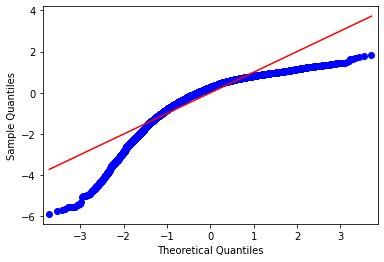

In [52]:
# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations
#data = 5 * randn(100) + 50
# q-q plot
qqplot(normalized_avg_rad, line='s')
pyplot.show()

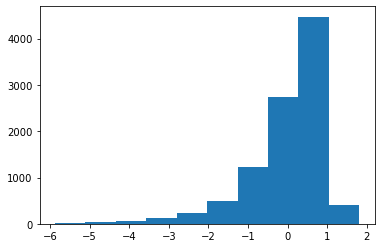

In [51]:
# histogram plot
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations
#data = 5 * randn(100) + 50
# histogram plot
pyplot.hist(normalized_avg_rad)
pyplot.show()

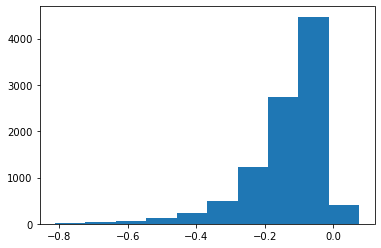

In [26]:
# histogram plot
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations
#data = 5 * randn(100) + 50
# histogram plot
pyplot.hist(volos_turbo_final['VrNIRBI'])
pyplot.show()


In [28]:
from sklearn.svm import OneClassSVM
model = OneClassSVM(gamma='scale', nu=0.01)
trainX = volos_turbo_final.drop(['label'],axis=1)
model.fit(trainX)
yhat = model.predict(axis=1)
model.score_samples(trainX)
# calculate score
#score = f1_score(testy, yhat, pos_label=-1)
#print('F1 Score: %.3f' % score)

array([69.11684134, 68.64956335, 68.615471  , ..., 68.66205165,
       68.66205165, 68.63610077])

In [32]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(random_state=0).fit(trainX)
pred=clf.predict(volos_turbo_viirs.drop(['date','building','id','@id','reducer','type','building:levels'],axis=1))

In [37]:
len(pred[pred==-1])

27628

In [9]:
# Make batches of these files
# First 1000
chicago_abandoned_sample1 =  chicago_abandoned[:1000]
chicago_not_abandoned_sample1 =  chicago_not_abandoned[:1000]

# Senond 1000
# chicago_abandoned_sample1 =  chicago_abandoned[1000:20000]
# chicago_not_abandoned_sample1 =  chicago_not_abandoned[1000:2000]
chicago_abandoned_fc1 = make_point_list(chicago_abandoned_sample1)
chicago_not_abandoned_fc1 = make_point_list(chicago_not_abandoned_sample1)

NameError: name 'make_point_list' is not defined

# S2  AND VIIRS  FOR  PHILLY BUILDINGS

In [177]:
# check  mean  difference significace
#  https://towardsdatascience.com/anova-t-test-and-other-statistical-tests-with-python-e7a36a2fdc0c
from scipy import stats
import pandas as pd
# import the data
#df= pd.read_csv("Iris_Data.csv")
#setosa = volos_amenities_viirs['avg_rad']
#versicolor = vacant_philly_bldgs_viirs['avg_rad']
# homogeneity
stats.levene(volos_amenities_viirs['avg_rad'],vacant_philly_bldgs_viirs['avg_rad'])
# Shapiro-Wilk test for normality
stats.shapiro(volos_amenities_viirs['avg_rad'])
stats.shapiro(vacant_philly_bldgs_viirs['avg_rad'])

C:\Users\Christos\anaconda3\envs\ml\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\Christos\anaconda3\envs\ml\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9358696937561035, pvalue=0.0)

In [185]:
stats.levene(volos_amenities_viirs['avg_rad'].iloc[:3000],vacant_philly_bldgs_viirs['avg_rad'].iloc[:3000])

LeveneResult(statistic=1474.2551187816864, pvalue=1.332969179747605e-288)

In [187]:
stats.shapiro(volos_amenities_viirs['avg_rad'].iloc[:1000])

ShapiroResult(statistic=0.9563784003257751, pvalue=1.1211261915408915e-16)

In [178]:
stats.shapiro(vacant_philly_bldgs_viirs['avg_rad'])

C:\Users\Christos\anaconda3\envs\ml\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9358696937561035, pvalue=0.0)

In [197]:
# These  results   show  that  we should use a non  parametric  approach
#  Ths wilcoxon

In [200]:
len(volos_turbo_viirs['avg_rad'])

49364

In [198]:
stats.wilcoxon(volos_amenities_viirs['avg_rad'].iloc[:1000],abandoned_chicago_regions_viirs['avg_rad'].iloc[:1000])

WilcoxonResult(statistic=2075.0, pvalue=1.6460273421042428e-162)

In [201]:
# Thus we  will do  a one class classification

In [ ]:
volos_turbo_final = pd.read_csv('./data/csvs/volos_turbo_final.csv')

#volos_turbo_viirs = pd.read_csv('./data/csvs/volos_turbo_viirs.csv')

volos_turbo_cfg = pd.read_csv('./data/csvs/turbo_volos_cfg.csv')

volos_amenities_cfg  = pd.read_csv('./data/csvs/volos_amenities_cfg.csv')

In [202]:

volos_amenities

,Unnamed: 0,date_x,VgNIRBI,amenity_x,PISI,type_x,NDVI,EMBI,VrNIRBI,IBI,...,month,year,date_y,amenity_y,avg_rad,id_y,@id_y,reducer_y,type_y,label
0,0,2020-01-04 09:29:30,-0.166943,university,0.054487,multipolygon,0.071631,-0.073549,-0.071631,4.277746,...,1,2020,2020-01-01,university,33.939999,relation/3560042,relation/3560042,mean,multipolygon,1.0
1,0,2020-01-04 09:29:30,-0.166943,university,0.054487,multipolygon,0.071631,-0.073549,-0.071631,4.277746,...,1,2020,2020-01-01,prison,49.459999,relation/3560382,relation/3560382,mean,multipolygon,1.0
2,0,2020-01-04 09:29:30,-0.166943,university,0.054487,multipolygon,0.071631,-0.073549,-0.071631,4.277746,...,1,2020,2020-01-01,parking,98.040001,relation/8234668,relation/8234668,mean,multipolygon,1.0
3,0,2020-01-04 09:29:30,-0.166943,university,0.054487,multipolygon,0.071631,-0.073549,-0.071631,4.277746,...,1,2020,2020-01-01,parking,32.930000,relation/14115705,relation/14115705,mean,multipolygon,1.0
4,0,2020-01-04 09:29:30,-0.166943,university,0.054487,multipolygon,0.071631,-0.073549,-0.071631,4.277746,...,1,2020,2020-01-01,parking_space,30.582142,way/26250160,way/26250160,mean,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14421162,24312,2022-05-03 09:29:41,-0.087048,post_office,0.103465,NaN,0.045282,-0.150802,-0.045282,-0.014899,...,5,2022,2022-05-01,bus_station,7.660000,node/9724693399,node/9724693399,mean,NaN,1.0
14421163,24312,2022-05-03 09:29:41,-0.087048,post_office,0.103465,NaN,0.045282,-0.150802,-0.045282,-0.014899,...,5,2022,2022-05-01,bus_station,7.660000,node/9724693400,node/9724693400,mean,NaN,1.0
14421164,24312,2022-05-03 09:29:41,-0.087048,post_office,0.103465,NaN,0.045282,-0.150802,-0.045282,-0.014899,...,5,2022,2022-05-01,place_of_worship,41.459999,node/9729450760,node/9729450760,mean,NaN,1.0
14421165,24312,2022-05-03 09:29:41,-0.087048,post_office,0.103465,NaN,0.045282,-0.150802,-0.045282,-0.014899,...,5,2022,2022-05-01,social_centre,41.459999,node/9729450761,node/9729450761,mean,NaN,1.0


In [209]:
volos_turbo_s2

,Unnamed: 0,date,VgNIRBI,building:levels,PISI,type,NDVI,building,EMBI,VrNIRBI,IBI,NDBI,id,@id,reducer,month,year
0,0,2020-01-04 09:29:30,-0.104926,2.0,0.087421,multipolygon,0.078712,grandstand,-0.052816,-0.078712,4.218635,0.049151,relation/2821121,relation/2821121,mean,1,2020
1,1,2020-01-04 09:29:30,-0.264219,1.0,0.032466,multipolygon,0.140273,grandstand,0.001069,-0.140273,0.417595,-0.007310,relation/2821125,relation/2821125,mean,1,2020
2,2,2020-01-04 09:29:30,-0.336806,NaN,0.017114,multipolygon,0.219708,yes,0.036701,-0.219708,1.372537,-0.006935,relation/3286509,relation/3286509,mean,1,2020
3,3,2020-01-04 09:29:30,-0.165165,NaN,0.064398,multipolygon,0.273171,yes,0.075486,-0.273171,-2.210336,0.150246,relation/3286513,relation/3286513,mean,1,2020
4,4,2020-01-04 09:29:30,-0.131503,NaN,0.069876,multipolygon,0.083905,yes,-0.116364,-0.083905,0.354652,-0.010272,relation/3560382,relation/3560382,mean,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49359,49359,2022-05-03 09:29:41,-0.029282,NaN,0.222188,NaN,0.004398,roof,-0.205138,-0.004398,2.804536,-0.074004,way/243195321,way/243195321,mean,5,2022
49360,49360,2022-05-03 09:29:41,-0.103768,NaN,0.090054,NaN,0.086091,yes,-0.162913,-0.086091,1.167357,-0.053032,way/581728023,way/581728023,mean,5,2022
49361,49361,2022-05-03 09:29:41,-0.134889,NaN,0.074477,NaN,0.095672,yes,-0.136561,-0.095672,0.129453,-0.022671,node/1886551394,node/1886551394,mean,5,2022
49362,49362,2022-05-03 09:29:41,-0.046506,NaN,0.138377,NaN,0.044630,school,-0.150712,-0.044630,-3.298938,0.015404,node/2149437197,node/2149437197,mean,5,2022


In [208]:
volos_turbo_s2['date'] = pd.to_datetime(volos_turbo_s2['date'], errors='coerce')
volos_turbo_viirs['date'] = pd.to_datetime(volos_turbo_viirs['date'], errors='coerce')
volos_turbo_s2['month']=volos_turbo_s2['date'].dt.month
volos_turbo_s2['year']=volos_turbo_s2['date'].dt.year
volos_turbo_viirs['month']=volos_turbo_viirs['date'].dt.month
volos_turbo_viirs['year']=volos_turbo_viirs['date'].dt.year

In [227]:
volos_turbo = volos_turbo_s2.merge(volos_turbo_viirs,how='left',on=['year','month','id','@id'])

In [235]:
volos_amenities = volos_amenities_s2.merge(volos_amenities_viirs,how='left',on=['year','month','id','@id'])

In [228]:
len(volos_turbo_s2)

49364

In [229]:
len(volos_turbo)

56588

In [231]:
volos_turbo['avg_rad'].nunique()

6529

In [237]:
len(volos_amenities)

27871

In [238]:
volos=volos_turbo.append(volos_amenities,ignore_index=True)

In [239]:
volos

,Unnamed: 0,date_x,VgNIRBI,building:levels_x,PISI,type_x,NDVI,building_x,EMBI,VrNIRBI,...,year,date_y,avg_rad,building:levels_y,reducer_y,type_y,building_y,amenity_x,amenity_y,label
0,0,2020-01-04 09:29:30,-0.104926,2.0,0.087421,multipolygon,0.078712,grandstand,-0.052816,-0.078712,...,2020,2020-01-01,31.074827,2.0,mean,multipolygon,grandstand,NaN,NaN,NaN
1,1,2020-01-04 09:29:30,-0.264219,1.0,0.032466,multipolygon,0.140273,grandstand,0.001069,-0.140273,...,2020,2020-01-01,40.900002,1.0,mean,multipolygon,grandstand,NaN,NaN,NaN
2,2,2020-01-04 09:29:30,-0.336806,NaN,0.017114,multipolygon,0.219708,yes,0.036701,-0.219708,...,2020,2020-01-01,30.088737,NaN,mean,multipolygon,yes,NaN,NaN,NaN
3,3,2020-01-04 09:29:30,-0.165165,NaN,0.064398,multipolygon,0.273171,yes,0.075486,-0.273171,...,2020,2020-01-01,101.230003,NaN,mean,multipolygon,yes,NaN,NaN,NaN
4,4,2020-01-04 09:29:30,-0.131503,NaN,0.069876,multipolygon,0.083905,yes,-0.116364,-0.083905,...,2020,2020-01-01,49.459999,NaN,mean,multipolygon,yes,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84454,24308,2022-05-03 09:29:41,-0.323125,NaN,-0.015730,NaN,0.342754,NaN,-0.131719,-0.342754,...,2022,2022-05-01,7.660000,NaN,mean,NaN,NaN,bus_station,bus_station,1.0
84455,24309,2022-05-03 09:29:41,-0.167445,NaN,0.069997,NaN,0.156031,NaN,-0.057795,-0.156031,...,2022,2022-05-01,7.660000,NaN,mean,NaN,NaN,bus_station,bus_station,1.0
84456,24310,2022-05-03 09:29:41,-0.280998,NaN,0.005385,NaN,0.178769,NaN,-0.023882,-0.178769,...,2022,2022-05-01,41.459999,NaN,mean,NaN,NaN,place_of_worship,place_of_worship,1.0
84457,24311,2022-05-03 09:29:41,-0.298744,NaN,-0.019351,NaN,0.221049,NaN,-0.024372,-0.221049,...,2022,2022-05-01,41.459999,NaN,mean,NaN,NaN,social_centre,social_centre,1.0


In [214]:
volos_turbo['avg_rad'].nunique()

6529

In [215]:
volos_turbo_viirs['avg_rad'].nunique()

9256

In [222]:
volos_turbo

MemoryError: Unable to allocate 454. MiB for an array with shape (59441480, 1) and data type int64

MemoryError: Unable to allocate 454. MiB for an array with shape (59441480, 1) and data type int64

In [221]:
volos_turbo.drop(['date','building','id','@id','reducer','type','building:levels'])

KeyError: "['date' 'building' 'id' '@id' 'reducer' 'type' 'building:levels'] not found in axis"

In [243]:
volos=volos.reset_index().drop('index',axis=1)

In [244]:
volos.columns

Index(['Unnamed: 0', 'date_x', 'VgNIRBI', 'building:levels_x', 'PISI',
       'type_x', 'NDVI', 'building_x', 'EMBI', 'VrNIRBI', 'IBI', 'NDBI', 'id',
       '@id', 'reducer_x', 'month', 'year', 'date_y', 'avg_rad',
       'building:levels_y', 'reducer_y', 'type_y', 'building_y', 'amenity_x',
       'amenity_y', 'label'],
      dtype='object')

In [247]:
volos_dropped=volos.drop(['Unnamed: 0', 'date_x','building:levels_x','type_x','building_x','id',
       '@id', 'reducer_x', 'month', 'year', 'date_y','building:levels_y', 'reducer_y', 'type_y', 'building_y', 'amenity_x',
       'amenity_y', 'label'],axis=1)

In [252]:
volos_dropped['avg_rad']=volos_dropped['avg_rad'].fillna(volos_dropped['avg_rad'].mean())

In [257]:
len(volos_dropped)

84459

In [281]:
volos_dropped['VgNIRBI'].mean()

-0.25305596293582333

In [286]:
#volos_dropped_1_row=pd.DataFrame(columns=volos_dropped.columns)
volos_dropped_1_row['VgNIRBI']=volos_dropped['VgNIRBI']
volos_dropped_1_row['PISI']=volos_dropped['PISI'].mean()
volos_dropped_1_row['NDVI']=volos_dropped['NDVI'].mean()
volos_dropped_1_row['VrNIRBI']=volos_dropped['VrNIRBI'].mean()
volos_dropped_1_row['EMBI']=volos_dropped['EMBI'].mean()
volos_dropped_1_row['IBI']=volos_dropped['IBI'].mean()
volos_dropped_1_row['avg_rad']=volos_dropped['avg_rad'].mean()
volos_dropped_1_row['NDBI']=volos_dropped['NDBI'].mean()


In [291]:

volos_dropped_1_row=volos_dropped_1_row[:1]
volos_dropped_1_row

,VgNIRBI,PISI,NDVI,EMBI,VrNIRBI,IBI,NDBI,avg_rad
0,-0.253056,0.037459,0.181231,-0.001584,-0.181231,-1.857394,0.018011,50.612454


In [325]:
volos_turbo_final.isnull().sum()

VgNIRBI       0
PISI          0
NDVI          0
EMBI          0
VrNIRBI       0
IBI           0
NDBI          0
cf_cvg     1686
avg_rad       0
label         0
dtype: int64

In [323]:
volos_turbo_final['label'].nunique()

2

In [ ]:
trainX

In [551]:
from sklearn.svm import OneClassSVM
one_class_svm = OneClassSVM(nu=0.5, kernel="rbf",gamma='auto')
trainX = volos_turbo_final[volos_turbo_final['label']==0].drop(['cf_cvg','label','IBI','VgNIRBI',
                                                             'VrNIRBI', 'NDBI','NDVI' ],axis=1)
one_class_svm.fit(trainX)
#yhat = model.predict(volos_turbo_viirs.drop(['date','building','id','@id','reducer','type','building:levels'],axis=1))
one_class_svm.score_samples(trainX)


array([127.87101897, 127.69899763, 127.9279858 , ..., 108.39606061,
       108.27639296, 124.3991431 ])

In [552]:
yhat = one_class_svm.predict(volos_turbo_final[volos_turbo_final['label']==1].drop(['cf_cvg','label','IBI','VgNIRBI',
                                                             'VrNIRBI', 'NDBI','NDVI'],axis=1))
yhat

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,
        1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  1, -1,
       -1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1, -1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1, -1, -1

In [550]:
import joblib
joblib.dump(one_class_svm, 'one_class_svm_5.pkl')

['one_class_svm_5.pkl']

In [553]:
len(yhat[yhat==-1])#PISI,VgNIRBI

180

In [544]:
len(yhat[yhat==-1])#EMBI,VgNIRBI

176

In [531]:
len(yhat[yhat==-1])#EMBI,VgNIRBI

176

In [539]:
len(yhat[yhat==-1])#EMBI,AVG_RAD

181

In [524]:
len(yhat[yhat==1])#PISI,AVG_RAD

142

In [506]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
X = trainX
clf = LocalOutlierFactor(n_neighbors=40,metric='correlation',novelty=True)
clf.fit(X)

clf.negative_outlier_factor_


array([-1., -1., -1., ..., -1., -1., -1.])

In [507]:
yhat = clf.predict(volos_turbo_final[volos_turbo_final['label']==1].drop(['cf_cvg','label','IBI','VgNIRBI',
                                                             'VrNIRBI','EMBI', 'NDBI','NDVI'],axis=1))

In [509]:
len(yhat[yhat==1])

272

In [365]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
# Generate train data
#X = 0.3 * np.random.randn(100, 2)
X_train =  volos_turbo_final[volos_turbo_final['label']==0].drop(['cf_cvg','label','IBI','VgNIRBI',
                                                             'VrNIRBI','EMBI', 'PISI' ],axis=1)
# Generate some regular novel observations
#X = 0.3 * np.random.randn(20, 2)
X_test = volos_turbo_final[volos_turbo_final['label']==1].drop(['cf_cvg','label','IBI','VgNIRBI',
                                                             'VrNIRBI','EMBI', 'PISI' ],axis=1)
# Generate some abnormal novel observations
#X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
#y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
#n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="darkred")
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors="palevioletred")

s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c="white", s=s, edgecolors="k")
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c="blueviolet", s=s, edgecolors="k")
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="gold", s=s, edgecolors="k")
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend(
    [a.collections[0], b1, b2, c],
    [
        "learned frontier",
        "training observations",
        "new regular observations",
        "new abnormal observations",
    ],
    loc="upper left",
    prop=matplotlib.font_manager.FontProperties(size=11),
)
plt.xlabel(
    "error train: %d/200 ; errors novel regular: %d/40 ; errors novel abnormal: %d/40"
    % (n_error_train, n_error_test, n_error_outliers)
)
plt.show()

ValueError: X.shape[1] = 2 should be equal to 3, the number of features at training time

In [360]:
len(yhat[yhat==-1])

60

In [351]:
import joblib
joblib.dump(one_class_svm, 'one_class_svm_2.pkl')

['one_class_svm_2.pkl']

In [354]:
from sklearn.ensemble import IsolationForest
X = volos_turbo_final[volos_turbo_final['label']==0].drop(['cf_cvg','label','IBI','VgNIRBI','VrNIRBI','EMBI', 'PISI' ],axis=1)
clf = IsolationForest(random_state=5).fit(X)
clf.predict(volos_turbo_final[volos_turbo_final['label']==1].drop(['cf_cvg','label','IBI','VgNIRBI',
                                                             'VrNIRBI','EMBI', 'PISI' ],axis=1))


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [338]:
clf

IsolationForest(random_state=0)

In [314]:
X=volos_turbo_final.drop(['label','cf_cvg'],axis=1)
y=volos_turbo_final['label']

In [315]:
X

,VgNIRBI,PISI,NDVI,EMBI,VrNIRBI,IBI,NDBI,avg_rad
0,-0.156262,0.057925,0.069752,-0.089758,-0.069752,-15.913936,-0.010811,70.093898
1,-0.163073,0.054353,0.129827,-0.124079,-0.129827,-0.019400,-0.044529,70.093898
2,-0.152122,0.073200,0.101133,-0.027589,-0.101133,-0.673711,0.087293,70.093898
3,-0.279784,0.023549,0.288706,-0.124254,-0.288706,0.978246,-0.123526,70.093898
4,-0.226384,0.048742,0.194209,-0.024817,-0.194209,-2.934090,0.011797,70.093898
...,...,...,...,...,...,...,...,...
9821,-0.235897,0.019614,0.178426,-0.045459,-0.178426,2.214779,0.003865,68.900002
9822,-0.219015,0.029755,0.152598,-0.043590,-0.152598,-3.224787,0.018013,68.900002
9823,-0.219015,0.029755,0.152598,-0.043590,-0.152598,-3.224787,0.018013,68.900002
9824,-0.219015,0.029755,0.152598,-0.043590,-0.152598,-3.224787,0.018013,74.459999


In [310]:
X.isnull().sum()

VgNIRBI       0
PISI          0
NDVI          0
EMBI          0
VrNIRBI       0
IBI           0
NDBI          0
cf_cvg     1686
avg_rad       0
dtype: int64

In [317]:
# isolation forest for imbalanced classification
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.ensemble import IsolationForest
# generate dataset
#X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
#	n_clusters_per_class=1, weights=[0.999], flip_y=0, random_state=4)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)
# define outlier detection model
model = IsolationForest(contamination=0.01)
# fit on majority class
#trainX = trainX[trainy==0]
model.fit(trainX)
# detect outliers in the test set
yhat = model.predict(testX)
# mark inliers 1, outliers -1
testy[testy == 1] = -1
testy[testy == 0] = 1
# calculate score
score = f1_score(testy, yhat, pos_label=-1)
print('F1 Score: %.3f' % score)

F1 Score: 0.000


In [295]:
model.get_params

<bound method BaseEstimator.get_params of OneClassSVM(nu=0.01)>

In [267]:
testy=trainX[80000:]
testy['label']=0
testy=testy['label']

C:\Users\Christos\AppData\Local\Temp/ipykernel_18224/1516421600.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testy['label']=0


In [269]:
yhat

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [268]:
from sklearn.metrics import f1_score
yhat = model.predict(trainX[80000:])
# calculate score
score = f1_score(testy, yhat, pos_label=-1)
print('F1 Score: %.3f' % score)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [176]:
from scipy import stats
rng = np.random.default_rng()
#rvs5 = stats.norm.rvs(loc=8, scale=20, size=100, random_state=rng)
stats.ttest_ind(vacant_philly_bldgs_viirs['avg_rad'], abandoned_chicago_regions_viirs['avg_rad'])
#Ttest_indResult(statistic=-2.8415950600298774, pvalue=0.0046418707568707885)
#stats.ttest_ind(volos_turbo_viirs['avg_rad'], volos_amenities_viirs['avg_rad'], equal_var=False)
#Ttest_indResult(statistic=-1.8686598649188084, pvalue=0.06434714193919686)

Ttest_indResult(statistic=-115.30731437167127, pvalue=0.0)

In [308]:
### EKTOS APO TO OIKONOMAKI TA ALLA EINAI ABANDONED

kount_fil = ee.Geometry.Polygon([
          [
            22.952406182885166,
            39.35917348693331
          ],
          [
            22.952624447643757,
            39.359061499184136
          ],
          [
            22.952531576156613,
            39.35895702896919
          ],
          [
            22.952297888696194,
            39.35905890687299
          ],
          [
            22.952407523989677,
            39.359176597701556
          ]
        ])
kount_mavro = ee.Geometry.Polygon([
          [
            22.951523065567017,
            39.35919215154071
          ],
          [
            22.951737642288208,
            39.35908016382146
          ],
          [
            22.951886504888535,
            39.3592429607245
          ],
          [
            22.95165583491325,
            39.35935598510286
          ],
          [
            22.951521389186382,
            39.35919085538758
          ]
        ])

fil_28okt = ee.Geometry.Polygon( [
          [
            22.95275218784809,
            39.35951204139807
          ],
          [
            22.952881939709187,
            39.35942908792906
          ],
          [
            22.95277565717697,
            39.35932072981181
          ],
          [
            22.95261740684509,
            39.35940160957075
          ],
          [
            22.952740788459778,
            39.359515670610094
          ]
        ])

fill_28okt2 = ee.Geometry.Polygon([
          [
            22.95280247926712,
            39.359597846288914
          ],
          [
            22.95294027775526,
            39.35953174283249
          ],
          [
            22.9528571292758,
            39.359441271726006
          ],
          [
            22.95270960777998,
            39.35952889130942
          ],
          [
            22.952714301645756,
            39.35956570187087
          ],
          [
            22.952717654407024,
            39.35957736718557
          ],
          [
            22.952751852571964,
            39.35956777570473
          ],
          [
            22.952791415154934,
            39.35959499476857
          ],
          [
            22.95280247926712,
            39.359595253997696
          ],
          [
            22.952802814543247,
            39.35960017935096
          ],
          [
            22.95280449092388,
            39.359598883205386
          ]
        ])

# not abandoned
fil_fer = ee.Geometry.Polygon([
          [
            22.95489829033613,
            39.361775077721575
          ],
          [
            22.954826205968857,
            39.361703014235744
          ],
          [
            22.954844646155834,
            39.36168823861977
          ],
          [
            22.95478966087103,
            39.361634320555964
          ],
          [
            22.95481715351343,
            39.361614360492915
          ],
          [
            22.954944893717766,
            39.36154437061647
          ],
          [
            22.955089397728443,
            39.3616892755052
          ],
          [
            22.954903990030285,
            39.361783632015296
          ],
          [
            22.954898625612255,
            39.36177715148985
          ]
        ])

fil_fer_apenanti = ee.Geometry.Polygon([
          [
            22.955063581466675,
            39.362018745072554
          ],
          [
            22.955232560634613,
            39.361943052752395
          ],
          [
            22.95509308576584,
            39.36182692190997
          ],
          [
            22.95496568083763,
            39.36189742994447
          ],
          [
            22.955056875944138,
            39.36201148690843
          ]
        ])
#not abandoned
konst_gamv = ee.Geometry.Polygon( [
          [
            22.95320212841034,
            39.36192127823414
          ],
          [
            22.953552156686783,
            39.36170871710425
          ],
          [
            22.95335903763771,
            39.36154488906026
          ],
          [
            22.95302912592888,
            39.361739823651455
          ],
          [
            22.953198105096817,
            39.36191816758813
          ]
        ])

poi_oikonomaki= ee.Geometry.Polygon([[[
              22.949098348617554,39.35979978548018],
            [22.951193153858185,39.35979978548018 ],
            [22.951193153858185,39.36196275350115],
            [22.949098348617554,39.36196275350115],
            [22.949098348617554,39.35979978548018]]])

In [309]:
# Some random places that for local dataset. Should add more
f1 = ee.Feature(konst_gamv) #,{'ID':'1_0','Class':'Not Abandoned','ClassPallete':'006633'}
f2 = ee.Feature(fil_fer_apenanti) # ,{'ID':'2_0','Class':'Not Abandoned','ClassPallete':'006633'}
f3 = ee.Feature(fil_fer) # ,{'ID':'3_0','Class':'Not Abandoned','ClassPallete':'006633'}
f4 = ee.Feature(fill_28okt2) # ,{'ID':'4_0','Class':'Abandoned','ClassPallete':'E5FFCC'}
f5 = ee.Feature(fil_28okt) # ,{'ID':'5_0','Class':'Abandoned','ClassPallete':'E5FFCC'}
f6 = ee.Feature(kount_mavro) # ,{'ID':'6_0','Class':'Abandoned','ClassPallete':'E5FFCC'}
f7 = ee.Feature(poi_oikonomaki) # ,{'ID':'7_0','Class':'Not Abandoned','ClassPallete':'006633'}
f8 = ee.Feature(kount_fil) # ,{'ID':'8_0','Class':'Abandoned','ClassPallete':'E5FFCC'}

#f2 = ee.Feature(ee.Geometry.Point([22.947140336036682,39.36547976654773]).buffer(50),{'ID':'B'})
abandoned_volos = ee.FeatureCollection([f4,f5,f6,f8])
not_abandoned_volos =  ee.FeatureCollection([f1,f2,f3,f7])

In [239]:
# Combine vacant/abandoned collections

abandoned_collection = ee.FeatureCollection([chicago_abandoned_fc1,vacant_philly_buildings_fc,vacant_uk_fc,abandoned_volos]).flatten()
not_abandoned_collection = ee.FeatureCollection([chicago_not_abandoned_fc1,volos_turbo_fc,not_abandoned_volos]).flatten()

In [240]:
abandoned_geojson =  geemap.ee_export_geojson(abandoned_collection)
abandoned_geojson_gdf = gpd.read_file(abandoned_geojson)
abandoned_geojson_gdf

,id,geometry
0,0_0,POINT (41.73868 -87.65007)
1,0_1,POINT (41.97459 -87.66357)
2,0_2,POINT (41.80043 -87.66284)
3,0_3,POINT (41.70922 -87.62144)
4,0_4,POINT (41.92275 -87.69507)
...,...,...
2073,2_73,POINT (52.85500 -1.33638)
2074,3_0,"POLYGON ((22.95280 39.35960, 22.95294 39.35953..."
2075,3_1,"POLYGON ((22.95275 39.35951, 22.95274 39.35952..."
2076,3_2,"POLYGON ((22.95152 39.35919, 22.95174 39.35908..."


In [236]:
not_abandoned_geojson =  geemap.ee_export_geojson(not_abandoned_collection)
not_abandoned_geojson_gdf = gpd.read_file(not_abandoned_geojson)
not_abandoned_geojson_gdf

,id,geometry
0,0_0,POINT (41.94804 -87.78606)
1,0_1,POINT (41.89782 -87.76142)
2,0_2,POINT (41.72716 -87.61766)
3,0_3,POINT (41.67039 -87.63715)
4,0_4,POINT (41.93608 -87.73062)
...,...,...
2203,1_1203,POINT (39.37162 22.94021)
2204,2_0,"POLYGON ((22.95320 39.36192, 22.95320 39.36192..."
2205,2_1,"POLYGON ((22.95506 39.36202, 22.95506 39.36201..."
2206,2_2,"POLYGON ((22.95490 39.36178, 22.95483 39.36170..."


In [105]:
abandoned_geojson_gdf.to_file("./data/geojson/abandoned_geojson.geojson", driver='GeoJSON')
#abandoned_geojson_gdf.crs = "EPSG:4326"
#abandoned_collection = geemap.geopandas_to_ee(abandoned_geojson_gdf)

In [29]:
# Get Time Series Data for selected locations
import wxee

In [ ]:
import eemont #improved iteration of ee api

def select_satellite(gee_name,bounds,indices):
    #data from sentinel-2 surface reflectance

    satellite = (ee.ImageCollection(gee_name)
        .filterBounds(bounds)
        .filterDate(startDate,endDate)
        .maskClouds()
        .scaleAndOffset()
        #.spectralIndices(['EVI','NDVI','NDBI','IBI','UI','BLFEI']))
        .spectralIndices(indices))
    print('satellite data loaded')
    return satellite
#select some bands
#N = s2.select('B8')
#R = s2.select('B4')
#B = s2.select('B2')
#G = s2.select('B3')

s2 = select_satellite(gee_name,magnisia,indices)

In [139]:
len(abandoned_collection)

1078

In [242]:
#generate time series over aoi, get spectral indices(awsome index) #  fixed
import time
from datetime import timedelta
def generate_time_series_region(geometry,startDate,endDate):
    print('start  collecting satellite  images')
    
    start_time = time.monotonic()
    
    #collect imageCollection
    
    s2 = (ee.ImageCollection("COPERNICUS/S2_SR")#.filterMetadata('CLOUDY_PIXEL_PERCENTAGE', 'less_than', 5)
      .filterDate(startDate,endDate)
      .filterBounds(geometry)
      .maskClouds()
      #.scaleAndOffset()
      .spectralIndices(['NDVI','NDBI','IBI','EMBI','VgNIRBI','VrNIRBI','PISI'],online=True)).select([ 'NDVI', 'NDBI', 'IBI', 
                                                                                              'EMBI','VgNIRBI','VrNIRBI','PISI'])

    print(len(s2))
    ts = s2.wx.to_time_series()
    
    
    #cloudless = ts.filterBounds(geometry).filterMetadata("CLOUDY_PIXEL_PERCENTAGE", "less_than", 5)
    #use geemap to generate a pandas dataframe from the time series(contains the ts for the selected indices)
    #satellite_df= geemap.ee_to_pandas(time_series)
    end_time = time.monotonic()
    print(timedelta(seconds=end_time - start_time))
    print('done collecting')
    
    print('start  calculating ts')
    start_time = time.monotonic()
    ts_mean =ts.aggregate_time(frequency="month",reducer=ee.Reducer.mean()).filterMetadata('CLOUDY_PIXEL_PERCENTAGE', 'less_than', 5)
    time_series = ts_mean.getTimeSeriesByRegion(
                               geometry = geometry,
                               bands = ['NDVI','NDBI','IBI','EMBI','VgNIRBI','VrNIRBI','PISI'],
                               reducer = [ee.Reducer.mean()],
                               scale = 10)
    end_time = time.monotonic()
    print(timedelta(seconds=end_time - start_time))
    print('done calculating ts')
    print(len(time_series))
    print('start  making dataframe ts')
    start_time = time.monotonic()
    satellite_df = geemap.ee_to_pandas(time_series)

    end_time = time.monotonic()
    print(timedelta(seconds=end_time - start_time))
    print('done making dataframe ts')
    satellite_df[satellite_df == -9999] = np.nan
    #satellite_df[satellite_df > -9999] = np.nan
    #filter outliers
    #satellite_df1=pd.DataFrame()
    #satellite_df1['date'] =
    #satellite_df=satellite_df[(np.abs(stats.zscore(satellite_df.drop(['date','reducer'],axis=1))) < 3).all(axis=1)]#==np.nan
    satellite_df['date']=pd.to_datetime(satellite_df['date'],infer_datetime_format = True)
    satellite_df['NDVI']=satellite_df['NDVI'].fillna(satellite_df['NDVI'].mean())
    satellite_df['NDBI']=satellite_df['NDBI'].fillna(satellite_df['NDBI'].mean())
    satellite_df['EMBI']=satellite_df['EMBI'].fillna(satellite_df['EMBI'].mean())
    satellite_df['IBI']=satellite_df['IBI'].fillna(satellite_df['IBI'].mean())
    satellite_df['VgNIRBI']=satellite_df['VgNIRBI'].fillna(satellite_df['VgNIRBI'].mean())
    satellite_df['VrNIRBI']=satellite_df['VrNIRBI'].fillna(satellite_df['VrNIRBI'].mean())
    satellite_df['PISI']=satellite_df['PISI'].fillna(satellite_df['PISI'].mean())
    #satellite_df['date'] = satellite_df1['date']
    return satellite_df

In [98]:
#generate time series over aoi, get spectral indices(awsome index) #  fixed
import time
from datetime import timedelta
def generate_time_series_regions(geometry,startDate,endDate):
    print('start  collecting satellite  images')
    
    start_time = time.monotonic()
    
    #collect imageCollection
    
    s2 = (ee.ImageCollection("COPERNICUS/S2_SR")#.filterMetadata('CLOUDY_PIXEL_PERCENTAGE', 'less_than', 5)
      .filterDate(startDate,endDate)
      .filterBounds(geometry)
      .maskClouds()
      .scaleAndOffset()
      .spectralIndices(['NDVI','NDBI','IBI','EMBI','VgNIRBI','VrNIRBI','PISI'],online=True)).select([ 'NDVI', 'NDBI', 'IBI', 
                                                                                              'EMBI','VgNIRBI','VrNIRBI','PISI'])

    print(len(s2))
    ts = s2.wx.to_time_series()
    
    
    #cloudless = ts.filterBounds(geometry).filterMetadata("CLOUDY_PIXEL_PERCENTAGE", "less_than", 5)
    #use geemap to generate a pandas dataframe from the time series(contains the ts for the selected indices)
    #satellite_df= geemap.ee_to_pandas(time_series)
    end_time = time.monotonic()
    print(timedelta(seconds=end_time - start_time))
    print('done collecting')
    
    print('start  calculating ts')
    start_time = time.monotonic()
    ts_mean =ts.aggregate_time(frequency="month",reducer=ee.Reducer.mean()).filterMetadata('CLOUDY_PIXEL_PERCENTAGE', 'less_than', 5)
    time_series = ts_mean.getTimeSeriesByRegions(
                               collection = geometry,
                               bands = ['NDVI','NDBI','IBI','EMBI','VgNIRBI','VrNIRBI','PISI'],
                               reducer = [ee.Reducer.mean()],
                               scale = 10)
    end_time = time.monotonic()
    print(timedelta(seconds=end_time - start_time))
    print('done calculating ts')
    print(len(time_series))
    print('start  making dataframe ts')
    start_time = time.monotonic()
    satellite_df = geemap.ee_to_pandas(time_series)

    end_time = time.monotonic()
    print(timedelta(seconds=end_time - start_time))
    print('done making dataframe ts')
    satellite_df[satellite_df == -9999] = np.nan
    #satellite_df[satellite_df > -9999] = np.nan
    #filter outliers
    #satellite_df1=pd.DataFrame()
    #satellite_df1['date'] =
    #satellite_df=satellite_df[(np.abs(stats.zscore(satellite_df.drop(['date','reducer'],axis=1))) < 3).all(axis=1)]#==np.nan
    satellite_df['date']=pd.to_datetime(satellite_df['date'],infer_datetime_format = True)
    satellite_df['NDVI']=satellite_df['NDVI'].fillna(satellite_df['NDVI'].mean())
    satellite_df['NDBI']=satellite_df['NDBI'].fillna(satellite_df['NDBI'].mean())
    satellite_df['EMBI']=satellite_df['EMBI'].fillna(satellite_df['EMBI'].mean())
    satellite_df['IBI']=satellite_df['IBI'].fillna(satellite_df['IBI'].mean())
    satellite_df['VgNIRBI']=satellite_df['VgNIRBI'].fillna(satellite_df['VgNIRBI'].mean())
    satellite_df['VrNIRBI']=satellite_df['VrNIRBI'].fillna(satellite_df['VrNIRBI'].mean())
    satellite_df['PISI']=satellite_df['PISI'].fillna(satellite_df['PISI'].mean())
    #satellite_df['date'] = satellite_df1['date']
    return satellite_df

In [ ]:
s2_df_class2018  = generate_time_series_region(abandoned_collection,'2018-01-01','2019-01-01')

start  collecting satellite  images
160
0:00:16.563000
done collecting
start  calculating ts
0:00:02.500000
done calculating ts
4
start  making dataframe ts


In [153]:
s2_df_class2018['IBI'].min()

-1.6944064970319819

In [ ]:
naValue

In [ ]:
# We  calculate yearly time series. For s2 and viirs 
# Then we will concat them

In [195]:
s2_df_class2018  = generate_time_series(abandoned_collection,'2018-01-01','2019-01-01')

start  collecting satellite  images
146
0:00:07.750000
done collecting
start  calculating ts
0:00:00.922000
done calculating ts
4312
start  making dataframe ts
0:01:43.875000
done making dataframe ts


In [209]:
s2_df_class2018_na_1  = generate_time_series(not_abandoned_collection,'2018-01-01','2018-06-01')

start  collecting satellite  images
59
0:00:14.766000
done collecting
start  calculating ts
0:00:01.922000
done calculating ts
2208
start  making dataframe ts
0:00:47.328000
done making dataframe ts


In [211]:
s2_df_class2018_na_2  = generate_time_series(not_abandoned_collection,'2018-06-01','2019-01-01')

start  collecting satellite  images
86
0:00:13.891000
done collecting
start  calculating ts
0:00:01.906000
done calculating ts
4416
start  making dataframe ts
0:00:41.750000
done making dataframe ts


In [214]:
s2_df_class2019_na = generate_time_series(not_abandoned_collection,'2019-01-01','2019-06-01')

start  collecting satellite  images
89
0:00:14.125000
done collecting
start  calculating ts
0:00:01.843000
done calculating ts
2208
start  making dataframe ts
0:00:40.266000
done making dataframe ts


In [217]:
s2_df_class2019_na_2 = generate_time_series(not_abandoned_collection,'2019-06-01','2019-09-01')

start  collecting satellite  images
55
0:00:15.203000
done collecting
start  calculating ts
0:00:01.922000
done calculating ts
4416
start  making dataframe ts
0:00:32.390000
done making dataframe ts


In [219]:
s2_df_class2019_na_3 = generate_time_series(not_abandoned_collection,'2019-09-01','2020-01-01')

start  collecting satellite  images
72
0:00:17.547000
done collecting
start  calculating ts
0:00:01.922000
done calculating ts
2208
start  making dataframe ts
0:00:31.844000
done making dataframe ts


In [225]:
s2_df_class2020_na_1 = generate_time_series(not_abandoned_collection,'2020-06-01','2020-09-01')

start  collecting satellite  images
55
0:00:14.266000
done collecting
start  calculating ts
0:00:01.734000
done calculating ts
2208
start  making dataframe ts
0:00:29.438000
done making dataframe ts


In [227]:
s2_df_class2020_na_2 = generate_time_series(not_abandoned_collection,'2020-09-01','2021-01-01')

start  collecting satellite  images
71
0:00:13.984000
done collecting
start  calculating ts
0:00:01.875000
done calculating ts
2208
start  making dataframe ts
0:00:31.063000
done making dataframe ts


In [230]:
s2_df_class2021_na_1 = generate_time_series(not_abandoned_collection,'2021-01-01','2021-06-01')

start  collecting satellite  images
310
0:00:15.922000
done collecting
start  calculating ts
0:00:01.843000
done calculating ts


KeyboardInterrupt: 

In [198]:
s2_df_class2019_1  = generate_time_series(abandoned_collection,'2019-01-01','2019-06-01')

start  collecting satellite  images
90
0:00:08.406000
done collecting
start  calculating ts
0:00:00.969000
done calculating ts
1078
start  making dataframe ts
0:00:33.531000
done making dataframe ts


In [199]:
s2_df_class2019_1

,date,IBI,VgNIRBI,NDBI,PISI,reducer,NDVI,EMBI,VrNIRBI
0,2019-04-01 09:19:41,-2.665034,-0.144470,0.036319,0.039763,mean,0.128292,-0.048712,-0.128292
1,2019-04-01 09:19:41,-2.665034,-0.144470,0.036319,0.039763,mean,0.128292,-0.048712,-0.128292
2,2019-04-01 09:19:41,-2.665034,-0.144470,0.036319,0.039763,mean,0.128292,-0.048712,-0.128292
3,2019-04-01 09:19:41,-2.665034,-0.144470,0.036319,0.039763,mean,0.128292,-0.048712,-0.128292
4,2019-04-01 09:19:41,-2.665034,-0.144470,0.036319,0.039763,mean,0.128292,-0.048712,-0.128292
...,...,...,...,...,...,...,...,...,...
1073,2019-04-01 09:19:41,-2.665034,-0.144470,0.036319,0.039763,mean,0.128292,-0.048712,-0.128292
1074,2019-04-01 09:19:41,-4.956279,-0.297294,0.062099,0.021543,mean,0.154266,0.059294,-0.154266
1075,2019-04-01 09:19:41,-1.452800,-0.171237,-0.019998,0.058868,mean,0.117402,-0.099845,-0.117402
1076,2019-04-01 09:19:41,-4.759475,-0.355611,-0.008339,0.000485,mean,0.273426,0.046899,-0.273426


In [200]:
s2_df_class2019_2  = generate_time_series(abandoned_collection,'2019-06-01','2020-01-01')

start  collecting satellite  images
125
0:00:11.250000
done collecting
start  calculating ts
0:00:01.282000
done calculating ts
4312
start  making dataframe ts
0:00:57.546000
done making dataframe ts


In [201]:
s2_df_class2019_2

,date,IBI,VgNIRBI,NDBI,PISI,reducer,NDVI,EMBI,VrNIRBI
0,2019-07-03 09:29:44,-3.198027,-0.167031,0.034317,0.037984,mean,0.133994,-0.034142,-0.133994
1,2019-07-03 09:29:44,-3.198027,-0.167031,0.034317,0.037984,mean,0.133994,-0.034142,-0.133994
2,2019-07-03 09:29:44,-3.198027,-0.167031,0.034317,0.037984,mean,0.133994,-0.034142,-0.133994
3,2019-07-03 09:29:44,-3.198027,-0.167031,0.034317,0.037984,mean,0.133994,-0.034142,-0.133994
4,2019-07-03 09:29:44,-3.198027,-0.167031,0.034317,0.037984,mean,0.133994,-0.034142,-0.133994
...,...,...,...,...,...,...,...,...,...
4307,2019-11-05 09:29:39,-3.198027,-0.167031,0.034317,0.037984,mean,0.133994,-0.034142,-0.133994
4308,2019-11-05 09:29:39,-0.202991,-0.298985,0.077534,0.034364,mean,0.148457,0.088858,-0.148457
4309,2019-11-05 09:29:39,1.213720,-0.195799,-0.098057,0.056550,mean,0.109091,-0.145167,-0.109091
4310,2019-11-05 09:29:39,3.483761,-0.294902,0.000561,0.028298,mean,0.212736,0.014451,-0.212736


In [202]:
s2_df_class2020  = generate_time_series(abandoned_collection,'2020-01-01','2021-01-01')

start  collecting satellite  images
214
0:00:11.703000
done collecting
start  calculating ts
0:00:00.797000
done calculating ts
3234
start  making dataframe ts
0:02:00.453000
done making dataframe ts


In [203]:
s2_df_class2020

,date,IBI,VgNIRBI,NDBI,PISI,reducer,NDVI,EMBI,VrNIRBI
0,2020-01-04 09:29:30,-18.305726,-0.145067,0.032327,0.046515,mean,0.109905,-0.056097,-0.109905
1,2020-01-04 09:29:30,-18.305726,-0.145067,0.032327,0.046515,mean,0.109905,-0.056097,-0.109905
2,2020-01-04 09:29:30,-18.305726,-0.145067,0.032327,0.046515,mean,0.109905,-0.056097,-0.109905
3,2020-01-04 09:29:30,-18.305726,-0.145067,0.032327,0.046515,mean,0.109905,-0.056097,-0.109905
4,2020-01-04 09:29:30,-18.305726,-0.145067,0.032327,0.046515,mean,0.109905,-0.056097,-0.109905
...,...,...,...,...,...,...,...,...,...
3229,2020-09-05 09:29:39,-18.305726,-0.145067,0.032327,0.046515,mean,0.109905,-0.056097,-0.109905
3230,2020-09-05 09:29:39,8.908910,-0.308404,0.103038,0.018865,mean,0.147372,0.107116,-0.147372
3231,2020-09-05 09:29:39,0.586053,-0.192361,-0.034158,0.046334,mean,0.117493,-0.097159,-0.117493
3232,2020-09-05 09:29:39,-1.594881,-0.275615,0.006593,0.019887,mean,0.204378,0.002900,-0.204378


In [204]:
s2_df_class2021  = generate_time_series(abandoned_collection,'2021-01-01','2022-01-01')

start  collecting satellite  images
486
0:00:09.046000
done collecting
start  calculating ts
0:00:00.782000
done calculating ts
3234
start  making dataframe ts
0:03:45.172000
done making dataframe ts


In [205]:
s2_df_class2021

,date,IBI,VgNIRBI,NDBI,PISI,reducer,NDVI,EMBI,VrNIRBI
0,2021-02-04 09:19:38,-29.731753,-0.048594,0.020619,0.067285,mean,0.058747,-0.120998,-0.058747
1,2021-02-04 09:19:38,-29.731753,-0.048594,0.020619,0.067285,mean,0.058747,-0.120998,-0.058747
2,2021-02-04 09:19:38,-29.731753,-0.048594,0.020619,0.067285,mean,0.058747,-0.120998,-0.058747
3,2021-02-04 09:19:38,-29.731753,-0.048594,0.020619,0.067285,mean,0.058747,-0.120998,-0.058747
4,2021-02-04 09:19:38,-29.731753,-0.048594,0.020619,0.067285,mean,0.058747,-0.120998,-0.058747
...,...,...,...,...,...,...,...,...,...
3229,2021-09-04 06:50:29,-29.731753,-0.048594,0.020619,0.067285,mean,0.058747,-0.120998,-0.058747
3230,2021-09-04 06:50:29,5.465109,-0.259828,0.039577,0.029167,mean,0.148127,0.012978,-0.148127
3231,2021-09-04 06:50:29,0.291457,-0.142490,-0.017187,0.063076,mean,0.087144,-0.114404,-0.087144
3232,2021-09-04 06:50:29,-2.431224,-0.338054,0.000351,0.003139,mean,0.260067,0.040056,-0.260067


In [206]:
s2_df_class2022  = generate_time_series(abandoned_collection,'2022-01-01','2022-05-01')

start  collecting satellite  images
216
0:00:08.562000
done collecting
start  calculating ts
0:00:00.953000
done calculating ts
0
start  making dataframe ts


Exception: Element.propertyNames: Parameter 'element' is required.

In [174]:
from scipy import stats
np.abs(stats.zscore(s2_df_class2018.drop(['date','reducer'],axis=1))) 

,IBI,VgNIRBI,NDBI,PISI,NDVI,EMBI,VrNIRBI
0,5.006088e-16,9.965743e-15,1.030452e-15,2.725819e-15,5.083941e-15,7.153681e-16,5.083941e-15
1,5.006088e-16,9.965743e-15,1.030452e-15,2.725819e-15,5.083941e-15,7.153681e-16,5.083941e-15
2,5.006088e-16,9.965743e-15,1.030452e-15,2.725819e-15,5.083941e-15,7.153681e-16,5.083941e-15
3,5.006088e-16,9.965743e-15,1.030452e-15,2.725819e-15,5.083941e-15,7.153681e-16,5.083941e-15
4,5.006088e-16,9.965743e-15,1.030452e-15,2.725819e-15,5.083941e-15,7.153681e-16,5.083941e-15
...,...,...,...,...,...,...,...
4307,5.006088e-16,9.965743e-15,1.030452e-15,2.725819e-15,5.083941e-15,7.153681e-16,5.083941e-15
4308,4.201613e+00,2.565548e+00,1.272108e+01,2.887579e-01,7.916702e+00,8.489857e+00,7.916702e+00
4309,4.340105e+00,1.902298e+01,9.467695e+00,1.562915e+01,1.363867e+01,2.139523e+01,1.363867e+01
4310,4.356126e+00,1.567654e+01,2.299170e+01,1.406162e+01,2.367365e+01,1.335282e+00,2.367365e+01


In [169]:
s2_df_class2018

,date,IBI,VgNIRBI,NDBI,reducer,NDVI,EMBI,VrNIRBI
0,2018-01-01 09:17:55,245.621585,-0.268979,0.028484,mean,0.173472,0.017751,-0.173472
1,2018-01-01 09:17:55,245.621585,-0.268979,0.028484,mean,0.173472,0.017751,-0.173472
2,2018-01-01 09:17:55,245.621585,-0.268979,0.028484,mean,0.173472,0.017751,-0.173472
3,2018-01-01 09:17:55,245.621585,-0.268979,0.028484,mean,0.173472,0.017751,-0.173472
4,2018-01-01 09:17:55,245.621585,-0.268979,0.028484,mean,0.173472,0.017751,-0.173472
...,...,...,...,...,...,...,...,...
4307,2018-09-01 09:22:21,245.621585,-0.268979,0.028484,mean,0.173472,0.017751,-0.173472
4308,2018-09-01 09:22:21,7.077949,-0.283270,0.071315,mean,0.130251,0.058925,-0.130251
4309,2018-09-01 09:22:21,-0.784811,-0.163017,-0.003393,mean,0.099012,-0.086014,-0.099012
4310,2018-09-01 09:22:21,-1.694406,-0.356300,-0.048927,mean,0.302717,0.011275,-0.302717


In [294]:
s2_df = pd.read_csv('./data/csvs/nea_ionia_mean.csv')   #dataframe  an  paroume  to   max
viirs_df = pd.read_csv('./data/csvs/nea_ionia_viirs.csv')

In [295]:
test_s2 = s2_df.drop(['date','reducer'],axis=1)

In [296]:
test_viirs = viirs_df.drop(['date','reducer'],axis=1)

In [297]:
test_s2_1 = test_s2[test_s2['pivot']==1].reset_index()

In [298]:
test_s2_1= test_s2_1.drop('index',axis=1)

In [299]:
test_s2_0 = test_s2[test_s2['pivot']==0].reset_index()
test_s2_0= test_s2_0.drop('index',axis=1)

In [300]:
abadnoned_s2_df['label'] = 1
not_abadnoned_s2_df['label']  = 0

s2= abadnoned_s2_df.append(not_abadnoned_s2_df,ignore_index=True)

In [301]:
s2.to_csv('./data/csvs/class_example.csv',index=False)

In [302]:
viirs_not_abandoned['label'] = 0
viirs_abandoned['label'] = 1
viirs = viirs_not_abandoned.append(viirs_abandoned,ignore_index=True)

In [303]:
turbo_volos_filled['label']  = -1
viirs_turbo['label'] = -1

In [235]:
s2_oik = pd.read_csv('./data/csvs/oik.csv')
viirs_oik = pd.read_csv('./data/csvs/viirs_oik.csv')

In [305]:
s2['label']

0       1
1       1
2       1
3       1
4       1
       ..
1740    0
1741    0
1742    0
1743    0
1744    0
Name: label, Length: 1745, dtype: int64

# Classification based on final chicago

In [278]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score,accuracy_score,roc_curve,plot_roc_curve 
# Define our dependent and independent variables
X1=chicago_final[['NDVI','NDBI','IBI','EMBI','PISI','VgNIRBI','VrNIRBI','avg_rad']]
y1=chicago_final['label']
#X2=turbo_volos_filled[['NDVI','NDBI','UI','IBI']]
#y2=turbo_volos_filled['label']

#X=X1.append(X2,ignore_index=True)
#y=y1.append(y2,ignore_index=True)

X_train,x_test,Y_train,y_test = train_test_split(X1,y1, test_size=0.3, random_state=1)

classifier = RandomForestClassifier(n_estimators=50)

classifier.fit(X_train, Y_train)
y_pred = classifier.predict(x_test)
accuracy_score(y_test, y_pred)





0.6872378186511778

In [290]:
# Feature Scaling



X_train,x_test,Y_train,y_test = train_test_split(X1,y1, test_size=0.3, random_state=1)
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)
classifier = RandomForestClassifier(n_estimators=50)

classifier.fit(X_train, Y_train)
y_pred = classifier.predict(x_test)
accuracy_score(y_test, y_pred)



0.436189093255889

In [288]:
#https://github.com/KUNJAN6902/MultiClass-Classifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
# Splitting Independent and Dependent Variables
#x_7per = dataframe_7per.iloc[:, 2:35].values
#y_7per = dataframe_7per.iloc[:, 1].values

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#SMOTE
#from imblearn.over_sampling import SMOTE
#smote = SMOTE('minority')
#x_sm, y_sm = smote.fit_sample(X_train, y_train)
import xgboost as xgb
#XGB Classifier
xg_cl = xgb.XGBClassifier(objective= "multi:softprob", 
                                  n_estimators=1000, 
                                  learning_rate=0.1, 
                                  seed=123,
                                  max_depth=8)

xg_cl.fit(X1, y1,'binary:logistic')

preds = xg_cl.predict(X_test)
        
print('Accuracy : ', accuracy_score(y_test, preds))

C:\Users\Christos\anaconda3\envs\ml\lib\site-packages\xgboost\core.py:525: FutureWarning: Pass `sample_weight` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  warnings.warn(


TypeError: ('Unsupported type for weight', "<class 'str'>")

In [282]:
from sklearn.model_selection import GridSearchCV
parameters = {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,None]
    
}
cv = GridSearchCV(classifier,parameters,cv=5)
cv.fit(X1,y1.values.ravel())

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Christos\anaconda3\envs\ml\lib\site-packages\IPython\core\interactiveshell.py", line 3441, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Christos\AppData\Local\Temp/ipykernel_16328/3507763753.py", line 8, in <module>
    cv.fit(X1,y1.values.ravel())
  File "C:\Users\Christos\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\Christos\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_search.py", line 841, in fit
    self._run_search(evaluate_candidates)
  File "C:\Users\Christos\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_search.py", line 1296, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "C:\Users\Christos\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_search.py", line 795, in evaluate_candidates
    out 

TypeError: object of type 'NoneType' has no len()

In [274]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2, svd_solver='full')
pca.fit(X1)
PCA(n_components=2, svd_solver='full')
print(pca.explained_variance_ratio_)

print(pca.singular_values_)


[0.99896587 0.00103406]
[443174.08471975  14258.43919614]


In [276]:
pca = PCA(n_components=2, svd_solver='full')
pca.fit(X1)
PCA(n_components=2, svd_solver='full')
print(pca.explained_variance_ratio_)

print(pca.singular_values_)


[0.99896587 0.00103406]
[443174.08471975  14258.43919614]


NameError: name 'finalDf' is not defined

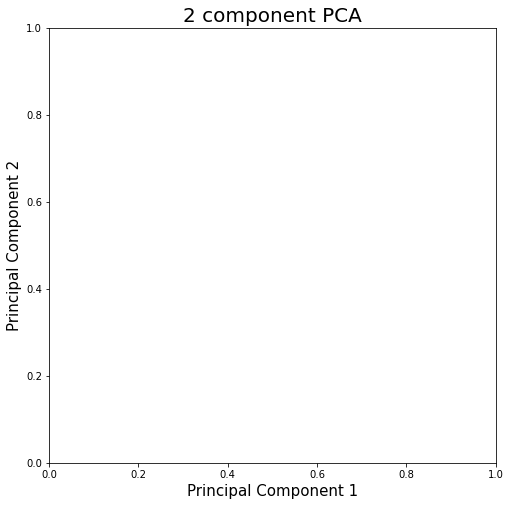

In [277]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['NDVI', 'NDBI', 'EMBI']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [263]:
import pickle
# save the model to disk
filename = 'chicago_classifier.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [265]:
import joblib
joblib.dump(classifier, 'chicago_classifier_simple.pkl') 

['chicago_classifier_simple.pkl']

In [267]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

#breast_cancer = load_breast_cancer()
#x = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
#y = pd.Categorical.from_codes(breast_cancer.target, breast_cancer.target_names)
# Transforming string Target to an int
encoder = LabelEncoder()
binary_encoded_y = pd.Series(encoder.fit_transform(y1))

#Train Test Split
train_x, test_x, train_y, test_y = train_test_split(X1, binary_encoded_y, random_state=1)
clf_boosting = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=10),
    n_estimators=200
)
clf_boosting.fit(train_x, train_y)
predictions = clf_boosting.predict(test_x)
print("For Boosting : F1 Score {}, Accuracy {}".format(round(f1_score(test_y,predictions),2),round(accuracy_score(test_y,predictions),2)))

For Boosting : F1 Score 0.66, Accuracy 0.66


In [268]:
import joblib
joblib.dump(clf_boosting, 'chicago_adaboost.pkl')

['chicago_adaboost.pkl']

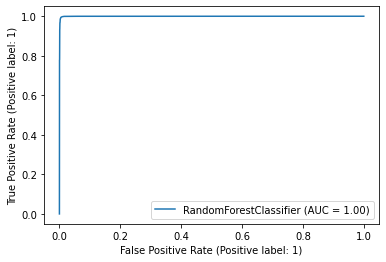

In [227]:
plot_roc_curve(classifier,X_train,Y_train)


In [228]:
fpr, tpr, thresholds = roc_curve(Y_train,classifier.predict_proba(X_train)[:,1], drop_intermediate=False)

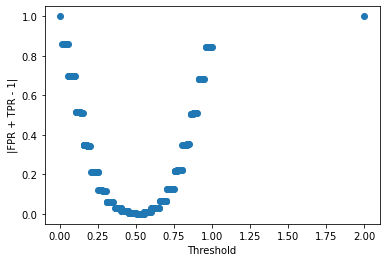

In [229]:

plt.scatter(thresholds,np.abs(fpr+tpr-1))
plt.xlabel("Threshold")
plt.ylabel("|FPR + TPR - 1|")
plt.show()

In [230]:
thresholds[np.argmin(np.abs(fpr+tpr-1))] 


0.5083333333333333

In [231]:
threshold = [] 
accuracy = [] 
for p in np.unique(classifier.predict_proba(X_train)[:,1]):       
 threshold.append(p) 
 y_pred = (classifier.predict_proba(X_train)[:,1] >= p).astype(int) 
 accuracy.append(balanced_accuracy_score(Y_train,y_pred))

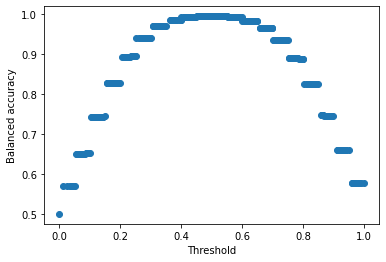

In [232]:
plt.scatter(threshold,accuracy)
plt.xlabel("Threshold")
plt.ylabel("Balanced accuracy")
plt.show()

In [233]:
threshold[np.argmax(accuracy)] 
# 0.5602892029098923

0.5375

In [236]:
test_s2_oik = s2_oik[:len(y_pred)]
test_s2_oik=test_s2_oik[['NDVI','NDBI','UI','IBI']]


In [315]:
len(y_pred_2)

1115

In [239]:
y_pred_s2_0 = classifier.predict(test_s2_0.drop('pivot',axis=1))
print("Existence of abandoned buildings nea_ionia 0:" ,accuracy_score(y_test[:len(y_pred_s2_0)], y_pred_s2_0[:len(y_test)]))
y_pred_s2_1  = classifier.predict(test_s2_1.drop('pivot',axis=1))
print("Existence of abandoned buildings  nea_ionia 1:", accuracy_score(y_test[:len(y_pred_s2_1)], y_pred_s2_1[:len(y_test)]))
y_pred_2_oik = classifier.predict(test_s2_oik)
print("Existence of abandoned buildings in oikonomaki:" ,accuracy_score(y_test[:len(y_pred_2_oik)], y_pred_2_oik[:len(y_test)]))

NameError: name 'test_s2_0' is not defined

In [317]:
if(y_pred_2_oik.max()==0):
    test_s2_oik['label'] =0
else:
    test_s2_oik['label'] =1

In [320]:
if(y_pred_s2_0.max()==0):
    test_s2_0['label'] =0
else:
    test_s2_0['label'] =1
if(y_pred_s2_1.max()==0):
    test_s2_1['label'] =0
else:
    test_s2_1['label'] =1

In [321]:
combine_test_dataset  = test_s2_0.append(test_s2_1,ignore_index=True)

In [361]:
combine_test_dataset

,IBI,UI,pivot,NDBI,NDVI,label
0,-20.542677,-0.024725,0,0.051145,0.140543,1
1,-4.497370,0.009060,0,0.071438,0.141690,1
2,-65.600286,0.028423,0,0.083669,0.126949,1
3,2.197527,0.016962,0,0.079091,0.149611,1
4,3.113097,0.058703,0,0.099755,0.144748,1
...,...,...,...,...,...,...
143,-9.111394,-0.002320,1,0.033901,0.112315,1
144,-0.214940,0.005720,1,0.068360,0.144849,1
145,347.884518,0.009392,1,0.045071,0.112793,1
146,0.991636,-0.016904,1,0.020630,0.207528,1


In [362]:
cl=combine_test_dataset['label']
cl
labels=[]
for i in cl.unique():
        labels.append(i)
        cl_df=pd.DataFrame({'label':labels})

In [324]:
map = geemap.Map()


In [363]:
import eemont
import geopandas as gpd
filepath  = 'https://raw.githubusercontent.com/ckyriakos/Thesis--BI-through-ML-from-Satellite-Data/master/nea_ionia.geojson'
nea_ionia  = gpd.read_file(filepath)


nea_ionia_geom = geemap.geopandas_to_ee(nea_ionia)
nea_ionia_fishnet = geemap.fishnet(nea_ionia_geom, rows=1, cols=1, delta=1)
map.centerObject(nea_ionia_geom, 7)
map.addLayer(nea_ionia_geom, {}, 'Nea Ionia')
map.addLayer(nea_ionia_fishnet, {}, 'Nea Ionia Fishnet')

nea_ionia_gdf = geemap.ee_to_geopandas(nea_ionia_fishnet['geometry'])
#nea_ionia_gdf = geemap.ee_to_geopandas(nea_ionia_fishnet)
## Add pivot

# I don't this is a good practice but otherwise I got an error
nea_ionia_gdf['pivot'] = 1

for i in range(len(nea_ionia_gdf)):
    nea_ionia_gdf['pivot'].loc[i] = i
# set crs for greece
nea_ionia_gdf.crs = "EPSG:4326"
nea_ionia_fc = geemap.geopandas_to_ee(nea_ionia_gdf)


In [364]:
nea_ionia_gdf

,geometry,pivot
0,"POLYGON ((22.93235 39.37078, 22.93654 39.37078...",0
1,"POLYGON ((22.93654 39.37078, 22.94074 39.37078...",1


In [365]:
#cl=combine_test_dataset['label']
#cl
labels=[]
for i in cl_df['label']:
        print(i)
        #labels.append(i)
        
        nea_ionia_gdf['label']=i

1


In [377]:
nea_ionia_gdf['label']==0

0    False
1    False
Name: label, dtype: bool

In [367]:
cl_df

,label
0,1


In [380]:
#cl_df.crs = "EPSG:4326"
Map=geemap.Map()
Map.add_data(nea_ionia_gdf,'label',colors=['green','red'],layer_name='pepega',zoom_to_layer=True)

In [370]:
#cl_df.crs = "EPSG:4326"
Map=geemap.Map()
Map.add_gdf(nea_ionia_gdf,fill_colors=['green','red'],layer_name='pepega_gdf',info_mode='on_click',zoom_to_layer=False)

In [381]:
Map

Map(center=[39.372173509413734, 22.936545], controls=(WidgetControl(options=['position', 'transparent_bg'], wi…

In [56]:
map

Map(center=[39.3721735094405, 22.934447500024692], controls=(WidgetControl(options=['position', 'transparent_b…

In [73]:
df= pd.concat([X,y])

In [242]:
import sktime.datatypes as dtp
dtp.MTYPE_REGISTER

[('pd.Series', 'Series', 'pd.Series representation of a univariate series'),
 ('pd.DataFrame',
  'Series',
  'pd.DataFrame representation of a uni- or multivariate series'),
 ('np.ndarray',
  'Series',
  '2D numpy.ndarray with rows=samples, cols=variables, index=integers'),
 ('nested_univ',
  'Panel',
  'pd.DataFrame with one column per variable, pd.Series in cells'),
 ('numpy3D',
  'Panel',
  '3D np.array of format (n_instances, n_columns, n_timepoints)'),
 ('numpyflat',
  'Panel',
  'WARNING: only for internal use, not a fully supported Panel mtype. 2D np.array of format (n_instances, n_columns*n_timepoints)'),
 ('pd-multiindex',
  'Panel',
  'pd.DataFrame with multi-index (instances, timepoints)'),
 ('pd-wide',
  'Panel',
  'pd.DataFrame in wide format, cols = (instance*timepoints)'),
 ('pd-long',
  'Panel',
  'pd.DataFrame in long format, cols = (index, time_index, column)'),
 ('df-list', 'Panel', 'list of pd.DataFrame'),
 ('pd_multiindex_hier', 'Hierarchical', 'pd.DataFrame with M

In [243]:
X1.to_numpy()

array([[ 5.64952805e-02, -5.03052044e-01,  2.63681603e+00, ...,
        -1.25692489e-01, -5.64952805e-02,  1.46229996e+02],
       [ 5.01583422e-02, -6.30723902e-01,  3.01604645e+00, ...,
        -6.94206181e-02, -5.01583422e-02,  1.30559998e+02],
       [ 3.79514749e-02, -6.33029199e-01,  2.92662615e+00, ...,
        -7.94692605e-02, -3.79514749e-02,  1.50059998e+02],
       ...,
       [ 4.71107158e-02, -1.32841700e-01,  2.44610469e+00, ...,
        -7.27156797e-02, -4.71107158e-02,  8.21800003e+01],
       [ 1.53112731e-01,  1.36723435e-02, -1.44667533e+00, ...,
        -2.17288336e-01, -1.53112731e-01,  7.72900009e+01],
       [ 4.13465057e-02, -7.39622642e-02,  1.41746025e+00, ...,
        -7.76221128e-02, -4.13465057e-02,  8.40199966e+01]])

In [244]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82640 entries, 0 to 82639
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   NDVI     82640 non-null  float64
 1   NDBI     82640 non-null  float64
 2   IBI      82640 non-null  float64
 3   EMBI     82640 non-null  float64
 4   PISI     82640 non-null  float64
 5   VgNIRBI  82640 non-null  float64
 6   VrNIRBI  82640 non-null  float64
 7   avg_rad  82640 non-null  float64
dtypes: float64(8)
memory usage: 5.0 MB


In [30]:
xx1=X1.drop('date',axis=1)


KeyError: "['date'] not found in axis"

In [415]:
xx1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1745 entries, 0 to 1744
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NDVI    1745 non-null   float64
 1   NDBI    1745 non-null   float64
 2   IBI     1745 non-null   float64
 3   UI      1745 non-null   float64
dtypes: float64(4)
memory usage: 54.7 KB


In [440]:
xx1.to_numpy()

array([[ 1.24282519e-01, -2.01713784e-03, -9.84907258e-01,
        -1.10885556e-01],
       [ 2.03770750e-01,  3.10834617e-02, -1.47676692e+00,
        -6.20422486e-02],
       [ 2.38915855e-01, -3.01800538e-02, -7.43070964e-01,
        -1.18759123e-01],
       ...,
       [ 1.03671056e-01,  2.47959695e-02, -1.29469839e+00,
        -6.89110638e-02],
       [ 1.03671056e-01,  2.47959695e-02, -1.29469839e+00,
        -6.89110638e-02],
       [ 6.31822707e-02,  2.10069783e-02,  5.46411528e+00,
        -9.09947069e-02]])

In [245]:
yy1=y1.to_numpy()

In [506]:
#https://github.com/alan-turing-institute/sktime/blob/main/examples/AA_datatypes_and_datasets.ipynb

In [246]:
from sktime.datatypes import check_is_mtype

check_is_mtype(yy1, mtype="np.ndarray", return_metadata=True)

(True,
 None,
 {'is_empty': False,
  'is_univariate': True,
  'is_equally_spaced': True,
  'has_nans': False,
  'mtype': 'np.ndarray',
  'scitype': 'Series'})

In [247]:
check_is_mtype(xx1.to_numpy(), mtype="np.ndarray", return_metadata=True)

NameError: name 'xx1' is not defined

In [248]:
from sktime.datatypes import convert_to

A=convert_to(X1.to_numpy(), to_type="numpy2D")
#=convert_to(A, to_type="nested_univ")

In [249]:
b=convert_to(yy1, to_type="numpy1D")

In [29]:
b

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [256]:
from sktime.classification.interval_based import TimeSeriesForestClassifier

X_train,x_test,Y_train,y_test = train_test_split(X1.to_numpy(),b, test_size=0.3, random_state=1)
clf = TimeSeriesForestClassifier(n_estimators=50)
clf.fit(X_train, Y_train)
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.6673120361406906

In [257]:
# https://www.kaggle.com/code/gautham11/building-a-scikit-learn-classification-pipeline/notebook

# https://pythonguides.com/scikit-learn-pipeline/

In [251]:
y_pred_3 = clf.predict(test_s2.to_numpy())
accuracy_score(y_test, y_pred_3[:len(y_test)])

NameError: name 'test_s2' is not defined

In [254]:
from sktime.classification.kernel_based import RocketClassifier


rocket = RocketClassifier()
rocket.fit(X_train[30000:60000], Y_train[30000:60000])
y_pred = rocket.predict(x_test[30000:60000])
accuracy_score(y_test[30000:60000], y_pred)

MemoryError: Unable to allocate 4.15 GiB for an array with shape (27848, 20000) and data type float64

In [467]:
from sktime.classification.hybrid import HIVECOTEV2

hc2 = HIVECOTEV2(time_limit_in_minutes=1)
hc2.fit(X_train, Y_train)
y_pred = hc2.predict(x_test)
accuracy_score(y_test, y_pred)

ZeroDivisionError: division by zero

In [6]:
# In this section I'll create a row and use the mean and label accordingly (0/1)
# Then I'll use DesicionTree to classify

a = philly_bldgs_1.append(uk,ignore_index=True)
combo = a.append(not_abad_col,ignore_index=True)
comboo = combo.append(test_df,ignore_index=True)

In [40]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y)

[Text(167.4, 163.07999999999998, 'X[4] <= 45.046\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')]

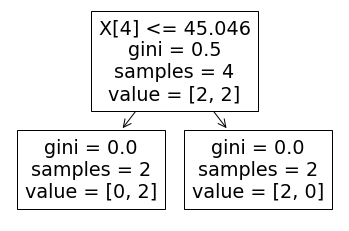

In [ ]:
#test

In [61]:
# EXAMPLE


In [84]:
import numpy as np
from sktime.utils.plotting import plot_series
from sktime.datasets import load_airline
from sktime.forecasting.theta import ThetaForecaster
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError

[Text(0.5, 0, 'Time'),
 Text(0, 0.5, 'Number of airline passengers'),
 Text(0.5, 1.0, 'Box-Jenkins International Airline passengers per month')]

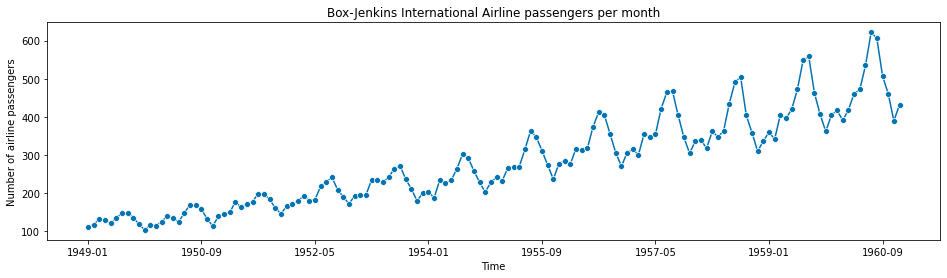

In [80]:
y = load_airline()
fig, ax = plot_series(y)
ax.set(xlabel="Time", ylabel="Number of airline passengers", title='Box-Jenkins International Airline passengers per month' )

C:\Users\Christos\anaconda3\envs\ml\lib\site-packages\sktime\performance_metrics\forecasting\_functions.py:1545: FutureWarning: In the percentage error metric functions the default argument symmetric=True is changing to symmetric=False in v0.12.0.
  warn(


0.08661467742505377

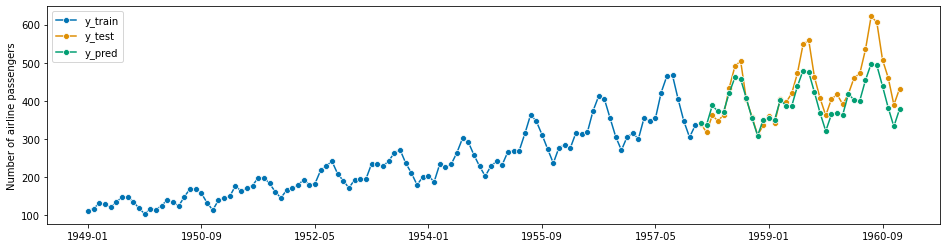

In [90]:
y = load_airline()
y_train, y_test = temporal_train_test_split(y)
fh = np.arange(1, len(y_test) + 1)  # forecasting horizon
forecaster = ThetaForecaster(sp=12)  # monthly seasonal periodicity
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
#smape = MeanAbsolutePercentageError(multioutput='raw_values', symmetric=True)
smape = MeanAbsolutePercentageError(symmetric=True)
smape(y_test, y_pred)

In [92]:
from sktime.performance_metrics.forecasting import MeanAbsoluteScaledError
mase = MeanAbsoluteScaledError(multioutput='raw_values')
mase(y_test, y_pred,y_train=y_train)

array([1.88291153])

In [93]:
from sktime.datasets import load_arrow_head
X, y = load_arrow_head(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
X_train.head()

(158, 1) (158,) (53, 1) (53,)


,dim_0
13,0 -1.900535 1 -1.882731 2 -1.86845...
123,0 -1.736913 1 -1.735307 2 -1.70952...
22,0 -2.011232 1 -2.007302 2 -1.98064...
113,0 -1.622830 1 -1.622411 2 -1.59462...
154,0 -1.610578 1 -1.609739 2 -1.58535...


In [310]:
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_arrow_head(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)
# initialize the classifier object and fit the model on x_train and # y_train
classifier = TimeSeriesForestClassifier()
classifier.fit(X_train, y_train)
#make predictions and print the accuracy score for performance
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.8867924528301887

In [315]:
y

array(['0', '1', '2', '0', '1', '2', '0', '1', '2', '0', '1', '2', '0',
       '1', '2', '0', '1', '2', '0', '1', '2', '0', '1', '2', '0', '1',
       '2', '0', '1', '2', '0', '1', '2', '0', '1', '2', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2

In [97]:
# multivariate

In [365]:
from sktime.datasets import load_basic_motions
X, y = load_basic_motions(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
X_train.head()

(60, 6) (60,) (20, 6) (20,)


,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5
9,0 -0.407421 1 -0.407421 2 2.355158 3...,0 1.413374 1 1.413374 2 -3.928032 3...,0 0.092782 1 0.092782 2 -0.211622 3...,0 -0.066584 1 -0.066584 2 -3.630177 3...,0 0.223723 1 0.223723 2 -0.026634 3...,0 0.135832 1 0.135832 2 -1.946925 3...
24,0 0.383922 1 0.383922 2 -0.272575 3...,0 0.302612 1 0.302612 2 -1.381236 3...,0 -0.398075 1 -0.398075 2 -0.681258 3...,0 0.071911 1 0.071911 2 -0.761725 3...,0 0.175783 1 0.175783 2 -0.114525 3...,0 -0.087891 1 -0.087891 2 -0.503377 3...
5,0 -0.357300 1 -0.357300 2 -0.005055 3...,0 -0.584885 1 -0.584885 2 0.295037 3...,0 -0.792751 1 -0.792751 2 0.213664 3...,0 0.074574 1 0.074574 2 -0.157139 3...,0 0.159802 1 0.159802 2 -0.306288 3...,0 0.023970 1 0.023970 2 1.230478 3...
7,0 -0.352746 1 -0.352746 2 -1.354561 3...,0 0.316845 1 0.316845 2 0.490525 3...,0 -0.473779 1 -0.473779 2 1.454261 3...,0 -0.327595 1 -0.327595 2 -0.269001 3...,0 0.106535 1 0.106535 2 0.021307 3...,0 0.197090 1 0.197090 2 0.460763 3...
34,0 0.052231 1 0.052231 2 -0.54804...,0 -0.730486 1 -0.730486 2 0.70700...,0 -0.518104 1 -0.518104 2 -1.179430 3...,0 -0.159802 1 -0.159802 2 -0.239704 3...,0 -0.045277 1 -0.045277 2 0.023970 3...,0 -0.029297 1 -0.029297 2 0.29829...


pandas.core.frame.DataFrame

In [122]:
from sktime.transformations.panel.compose import ColumnConcatenator
from sklearn.pipeline import Pipeline


In [369]:
s2

,date,NDVI,NDBI,IBI,UI,label
0,2017-03-30,0.124283,-0.002017,-0.984907,-0.110886,1
1,2017-04-06,0.203771,0.031083,-1.476767,-0.062042,1
2,2017-04-16,0.238916,-0.030180,-0.743071,-0.118759,1
3,2017-04-19,0.215031,-0.041755,-5.841253,-0.141597,1
4,2017-04-26,0.102966,0.021663,-64.898732,-0.080065,1
...,...,...,...,...,...,...
1740,2021-12-21,0.104472,-0.001270,-0.265410,-0.118928,0
1741,2021-12-24,0.090393,0.045353,2.254664,-0.049362,0
1742,2021-12-26,0.103671,0.024796,-1.294698,-0.068911,0
1743,2021-12-29,0.103671,0.024796,-1.294698,-0.068911,0


In [237]:
X1.reset_index()

,index,date,NDVI,NDBI,IBI,UI,label
0,2,2017-04-16,0.238916,-0.030180,-0.743071,-0.118759,1
1,3,2017-04-19,0.215031,-0.041755,-5.841253,-0.141597,1
2,4,2017-04-26,0.102966,0.021663,-64.898732,-0.080065,1
3,5,2017-04-29,0.151810,-0.089192,1.155699,-0.197230,1
4,6,2017-05-06,0.282564,-0.062342,-0.001884,-0.155152,1
...,...,...,...,...,...,...,...
1738,1740,2021-12-21,0.104472,-0.001270,-0.265410,-0.118928,0
1739,1741,2021-12-24,0.090393,0.045353,2.254664,-0.049362,0
1740,1742,2021-12-26,0.103671,0.024796,-1.294698,-0.068911,0
1741,1743,2021-12-29,0.103671,0.024796,-1.294698,-0.068911,0


In [370]:
X1=s2.drop('label',axis=1)
y1=s2['label']

In [371]:
X1

,date,NDVI,NDBI,IBI,UI
0,2017-03-30,0.124283,-0.002017,-0.984907,-0.110886
1,2017-04-06,0.203771,0.031083,-1.476767,-0.062042
2,2017-04-16,0.238916,-0.030180,-0.743071,-0.118759
3,2017-04-19,0.215031,-0.041755,-5.841253,-0.141597
4,2017-04-26,0.102966,0.021663,-64.898732,-0.080065
...,...,...,...,...,...
1740,2021-12-21,0.104472,-0.001270,-0.265410,-0.118928
1741,2021-12-24,0.090393,0.045353,2.254664,-0.049362
1742,2021-12-26,0.103671,0.024796,-1.294698,-0.068911
1743,2021-12-29,0.103671,0.024796,-1.294698,-0.068911


(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='NDBI'>)

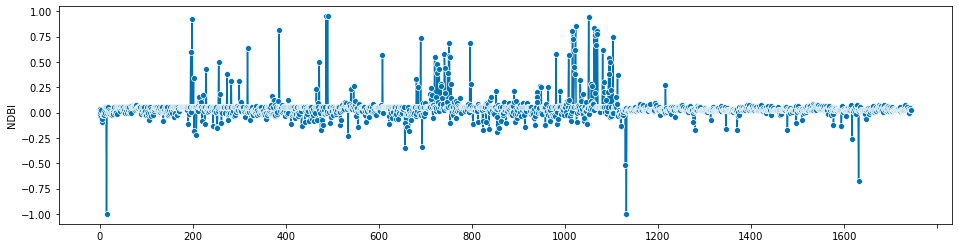

In [319]:
plot_series(df[])

In [266]:
sktime.datatypes.MTYPE_REGISTER

[('pd.Series', 'Series', 'pd.Series representation of a univariate series'),
 ('pd.DataFrame',
  'Series',
  'pd.DataFrame representation of a uni- or multivariate series'),
 ('np.ndarray',
  'Series',
  '2D numpy.ndarray with rows=samples, cols=variables, index=integers'),
 ('nested_univ',
  'Panel',
  'pd.DataFrame with one column per variable, pd.Series in cells'),
 ('numpy3D',
  'Panel',
  '3D np.array of format (n_instances, n_columns, n_timepoints)'),
 ('numpyflat',
  'Panel',
  'WARNING: only for internal use, not a fully supported Panel mtype. 2D np.array of format (n_instances, n_columns*n_timepoints)'),
 ('pd-multiindex',
  'Panel',
  'pd.DataFrame with multi-index (instances, timepoints)'),
 ('pd-wide',
  'Panel',
  'pd.DataFrame in wide format, cols = (instance*timepoints)'),
 ('pd-long',
  'Panel',
  'pd.DataFrame in long format, cols = (index, time_index, column)'),
 ('df-list', 'Panel', 'list of pd.DataFrame'),
 ('pd_multiindex_hier', 'Hierarchical', 'pd.DataFrame with M

In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1745 entries, 0 to 1744
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NDVI    1745 non-null   float64
 1   NDBI    1745 non-null   float64
 2   IBI     1745 non-null   float64
 3   UI      1745 non-null   float64
 4   label   1745 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 68.3 KB


In [323]:
df1

,NDVI,NDBI,IBI,UI,label
0,0.124283,-0.002017,-0.984907,-0.110886,1
1,0.203771,0.031083,-1.476767,-0.062042,1
2,0.238916,-0.030180,-0.743071,-0.118759,1
3,0.215031,-0.041755,-5.841253,-0.141597,1
4,0.102966,0.021663,-64.898732,-0.080065,1
...,...,...,...,...,...
1740,0.104472,-0.001270,-0.265410,-0.118928,0
1741,0.090393,0.045353,2.254664,-0.049362,0
1742,0.103671,0.024796,-1.294698,-0.068911,0
1743,0.103671,0.024796,-1.294698,-0.068911,0


In [361]:
X= df.drop('label',axis=1)
del X['date']
X

,NDVI,NDBI,IBI,UI
0,0.124283,-0.002017,-0.984907,-0.110886
1,0.203771,0.031083,-1.476767,-0.062042
2,0.238916,-0.030180,-0.743071,-0.118759
3,0.215031,-0.041755,-5.841253,-0.141597
4,0.102966,0.021663,-64.898732,-0.080065
...,...,...,...,...
1740,0.104472,-0.001270,-0.265410,-0.118928
1741,0.090393,0.045353,2.254664,-0.049362
1742,0.103671,0.024796,-1.294698,-0.068911
1743,0.103671,0.024796,-1.294698,-0.068911


In [354]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

X = diabetes["data"]
y = diabetes["target"]

print(X.shape, y.shape)

(442, 10) (442,)


In [357]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [362]:
from sktime.datatypes import convert
df = pd.read_csv('./data/csvs/class_example.csv')


nested = convert(X,from_type='pd-long',to_type='nested_univ')

ValueError: DataFrame constructor not properly called!

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1[:len(y1)-2], random_state=42)


In [444]:
from sktime.datatypes import mtype,scitype,mtype_to_scitype
mtype(df)

TypeError: No valid mtype could be identified for object of type <class 'pandas.core.frame.DataFrame'>. Errors returned are as follows, in format [mtype]: [error message] 
pd.DataFrame: obj should not have column of 'object' dtype
pd.Series: obj must be a pandas.Series, found <class 'pandas.core.frame.DataFrame'>
np.ndarray: obj must be a numpy.ndarray, found <class 'pandas.core.frame.DataFrame'>
df-list: obj must be list of pd.DataFrame, found <class 'pandas.core.frame.DataFrame'>
numpy3D: obj must be a numpy.ndarray, found <class 'pandas.core.frame.DataFrame'>
pd-multiindex: obj have a MultiIndex, found <class 'pandas.core.indexes.range.RangeIndex'>
nested_univ: obj entries must be pd.Series
pd_multiindex_hier: obj must have a MultiIndex, found <class 'pandas.core.indexes.range.RangeIndex'>
alignment: obj index columns must be named 'ind0', 'ind1', ... 'ind6'
pd_DataFrame_Table: obj should not have column of 'object' dtype
pd_Series_Table: obj must be a pandas.Series, found <class 'pandas.core.frame.DataFrame'>
numpy1D: obj must be a numpy.ndarray, found <class 'pandas.core.frame.DataFrame'>
numpy2D: obj must be a numpy.ndarray, found <class 'pandas.core.frame.DataFrame'>
list_of_dict: obj must be a list of dict, found <class 'pandas.core.frame.DataFrame'>
pred_quantiles: obj should only have numeric dtype columns
pred_interval: obj should only have numeric dtype columns


In [297]:
df1=  pd.DataFrame({'NDVI':df['NDVI'],'NDBI':df['NDBI'],'IBI':df['IBI'],'UI':df['UI'],'label':df['label']})

In [403]:
from sktime.datatypes import check_raise
mtype(df1)


TypeError: Error in check_is_mtype, more than one mtype identified: ['pd.DataFrame', 'pd_DataFrame_Table']

In [245]:
steps = [('concatenate', ColumnConcatenator()),('classify', TimeSeriesForestClassifier(n_estimators=100))]
clf = Pipeline(steps)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

TypeError: X must be in an sktime compatible format, of scitype Series, Panel or Hierarchical, for instance a pandas.DataFrame with sktime compatible time indices, or with MultiIndex and lowest level a sktime compatible time index. allowed compatible mtype format specifications are: ['pd.Series', 'pd.DataFrame', 'np.ndarray', 'nested_univ', 'numpy3D', 'pd-multiindex', 'df-list', 'pd_multiindex_hier'] See the data format tutorial examples/AA_datatypes_and_datasets.ipynb

In [148]:
from sktime.classification.interval_based import CanonicalIntervalForest
from sktime.classification.dictionary_based import BOSSEnsemble
from sktime.classification.compose import ColumnEnsembleClassifier

In [156]:
clf = ColumnEnsembleClassifier(estimators=[
    ("TSF0", TimeSeriesForestClassifier(n_estimators=100), 5),
    ("BOSSEnsemble3", BOSSEnsemble(max_ensemble_size=5), [3, 4]),
])#estimators = [("cBOSS", cboss, 5), ("CIF", cif, )]

clf.fit(X_train, y_train)
clf.score(X_test, y_test)

IndexError: index 5 is out of bounds for axis 0 with size 1

In [ ]:
clf = MrSEQLClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

In [159]:
X_train, y_train = load_basic_motions(split="train")
X_test, y_test = load_basic_motions(split="test")
cboss = ContractableBOSS(
    n_parameter_samples=4, max_ensemble_size=2, random_state=0
)
cif = CanonicalIntervalForest(
    n_estimators=2, n_intervals=4, att_subsample_size=4, random_state=0
)
estimators = [("cBOSS", cboss, 5), ("CIF", cif, [3, 4])]
col_ens = ColumnEnsembleClassifier(estimators=estimators)
col_ens.fit(X_train, y_train)
y_pred = col_ens.predict(X_test)

In [162]:
col_ens.score(X_test, y_pred)

1.0